<a href="https://colab.research.google.com/github/freddy120/Competencia_kaggle_ML/blob/main/Competencia_kaggle_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Competencia de clasificación kaggle:
competencia: https://www.kaggle.com/c/imlclassification1

Grupo2:
* Freddy Rodrigo Mendoza Ticona.
* William Alexander Romero Bolívar.
* Maria Paula Salamanca Delgado.
* Jorge Oswaldo Suárez Rodríguez.







In [ ]:
!pip install hpsklearn

     |████████████████████████████████| 154 kB 6.4 MB/s 
  Created wheel for hpsklearn: filename=hpsklearn-0.1.0-py3-none-any.whl size=23913 sha256=8ca95a1137494c8b6bab51dfba19ea98c7c8d7f1c311295815176ae64ef9bf8d
  Stored in directory: /root/.cache/pip/wheels/b2/22/23/9207fbe861f70774b563f909a415b228450bfcf863c64ac1e8
Successfully built hpsklearn


In [ ]:
!pip install boruta

     |████████████████████████████████| 56 kB 2.2 MB/s 


In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import f_regression, SelectKBest, mutual_info_regression, mutual_info_classif, RFE, SelectFromModel, SequentialFeatureSelector
from boruta import BorutaPy
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from imblearn.over_sampling import SMOTE, SMOTENC

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder


from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow import keras
from keras import layers

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.vis_utils import plot_model

pd.set_option("display.max_columns", None)


import warnings
from sklearn.exceptions import DataConversionWarning, ConvergenceWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)


## Lectura de datos

In [ ]:
train_df = pd.read_excel('/content/drive/MyDrive/MIAD/intro_ML/competencia/Train.xlsx')
test_df = pd.read_excel('/content/drive/MyDrive/MIAD/intro_ML/competencia/Test.xlsx')

train_df.head()

FRACASO      ACTIVOS   TAMA¥O TIPO.COMERCIO       REGION     ZONA  \
0        1   678.749515  PEQUE¥A     POR MENOR  BOGOTA D.C.  CAPITAL   
1        0  4278.893204  PEQUE¥A     POR MENOR  BOGOTA D.C.  CAPITAL   
2        0   773.634952  PEQUE¥A     POR MENOR        VALLE    OTRAS   
3        0  4846.850485  PEQUE¥A     POR MENOR  BOGOTA D.C.  CAPITAL   
4        0  5932.570874  MEDIANA     POR MENOR  BOGOTA D.C.  CAPITAL   

        B11       B12       B13       B14       B21       B22       B23  \
0  0.102777  0.052250  0.119351  0.092935  0.074804  0.038029  0.086866   
1 -0.165065 -0.044984 -0.059135 -0.187988  0.047596  0.012971  0.017051   
2  0.091777  0.122194  0.586219  0.154371  0.030968  0.041231  0.197804   
3 -0.229705 -0.081568 -0.525965 -0.096540 -0.328871 -0.116782 -0.753030   
4 -0.005135 -0.025789 -0.141093 -0.031556  0.006670  0.033496  0.183261   

        B24       B31       B32       B33       B41       B42       B43  \
0  0.067641  0.562216  0.000000  0.562216  0.079966  0.379663  0.999302   
1  0.054206  0.081873  0.157420  0.239292  0.041687  0.368295  0.495467   
2  0.052088  0.777021  0.014535  0.791556  0.157999  0.451084  0.990826   
3 -0.138217  0.844917  0.000000  0.844917  0.000237  0.489087  0.893859   
4  0.040987  0.817223  0.000000  0.817223  0.283484  0.572280  0.991481   

        B44       B51       B52       B53       B61       B62       B63  \
0  0.437086  0.142233  0.675297  1.777434  0.157296  0.589516  1.218855   
1  0.413594  0.509172  4.498387  6.051666  0.152968  1.183171  0.466643   
2  0.213805  0.203339  0.580530  1.275159  0.118670  0.220131  0.405391   
3  0.048942  0.000280  0.578858  1.057925  0.000667  1.376657  1.139885   
4  0.174258  0.346888  0.700275  1.213232  0.056450  0.028097  0.083475   

        B64       B65       B66       B67       B68       B69      B610  \
0  0.746812  1.965667  0.859765  0.861137  1.967039  0.855297  4.060794   
1  1.351426  1.818069  1.517645  2.791346  3.669408  0.714214  6.238498   
2  0.338801  0.744192  0.160585  0.156558  0.751082  0.325767  0.930060   
3  1.377325  2.517210  0.137825  0.436730  2.816115  0.001792  3.698297   
4  0.113958  0.197433  0.034700  0.036396  0.199129  0.863850  1.743886   

       B611        A1        A2        A3        A4        A5  
0 -1.952554  0.437086  0.267744  0.038029  0.778675  0.508378  
1  4.835801  0.413594  0.005105  0.021488  3.178988  0.272524  
2 -0.672028  0.213805  0.089447  0.066563  0.263334  1.331412  
3 -2.690661  0.048942  0.145157 -0.113417  0.183548  0.355099  
4 -0.746403  0.174258  0.000000  0.066147  0.223656  5.021868

In [ ]:
predictors = ['B11', 'B12',
       'B13', 'B14', 'B21', 'B22', 'B23', 'B24', 'B31', 'B32', 'B33', 'B41',
       'B42', 'B43', 'B44', 'B51', 'B52', 'B53', 'B61', 'B62', 'B63', 'B64',
       'B65', 'B66', 'B67', 'B68', 'B69', 'B610', 'B611', 'A1', 'A2', 'A3',
       'A4', 'A5', 'ACTIVOS','TAMA¥O', 'TIPO.COMERCIO', 'REGION', 'ZONA']
target = ['FRACASO']

train_df = train_df[predictors + target]
test_df = test_df[predictors]

print(f"Dimension de train{train_df.shape}")
print(f"Dimension de test{test_df.shape}")

Dimension de train(2000, 40)
Dimension de test(964, 39)


# Exploración y Visualización de datos: 
Se utilizan histogramas, correlogramas y estadísticas descriptivas para la interpretación de los datos del contexto

## Análisis Exploratorio

In [ ]:
print(train_df.describe())

               B11          B12          B13          B14          B21  \
count  1981.000000  2000.000000  2000.000000  2000.000000  1981.000000   
mean     -0.019246    -0.003072     0.009022    -0.133080    -0.061784   
std       0.676537     0.077618     0.444655     4.542799     2.897712   
min     -29.432146    -0.754133    -3.268558  -201.403626  -127.555076   
25%      -0.014491    -0.020065    -0.046763    -0.040875     0.007942   
50%       0.000584     0.000754     0.002018     0.001322     0.025322   
75%       0.015336     0.022424     0.055711     0.043565     0.051070   
max       2.438964     0.445175    11.003726     1.956962     2.150315   

               B22          B23          B24          B31          B32  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.035501     0.086187    -0.068926     0.450588     0.096818   
std       0.142783     1.559707     7.623879     0.251624     0.180568   
min      -3.243274   -31.460777  -339

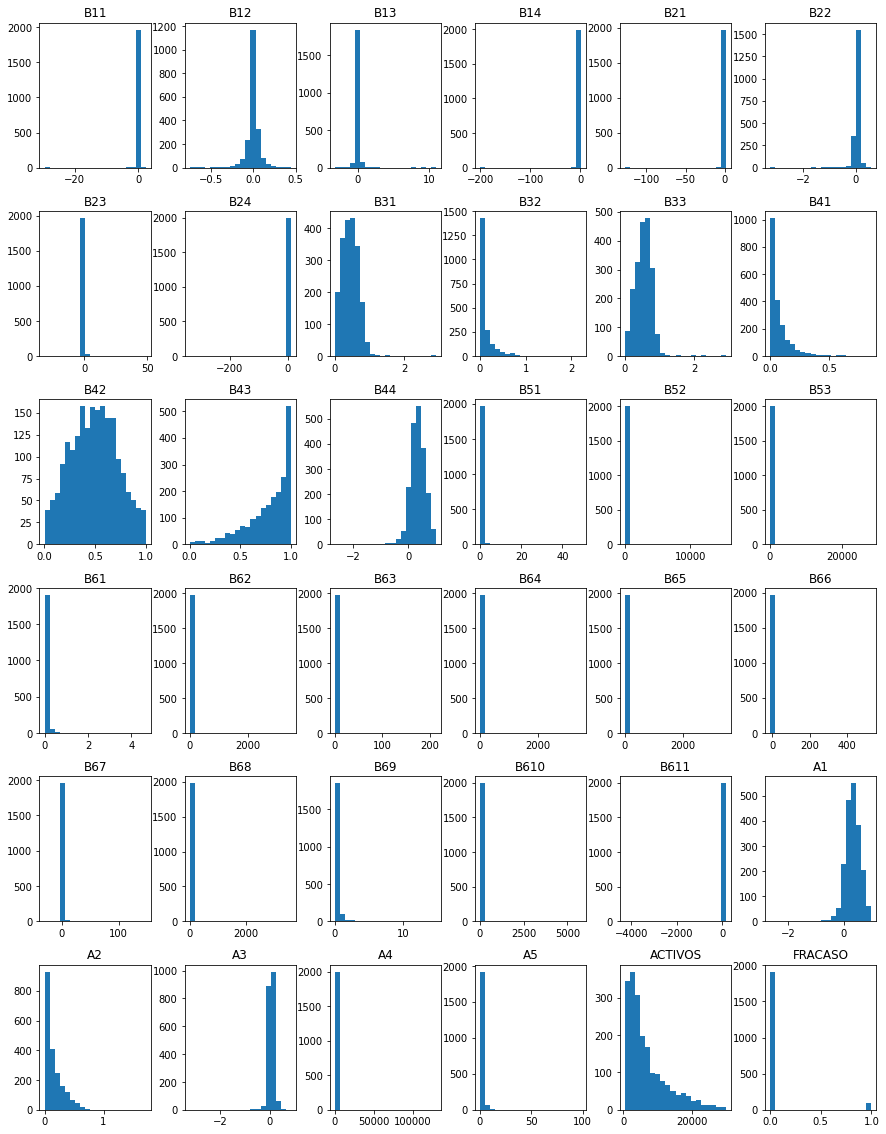

In [ ]:
hist = train_df.hist(grid = False, figsize = (15,20), bins=20)

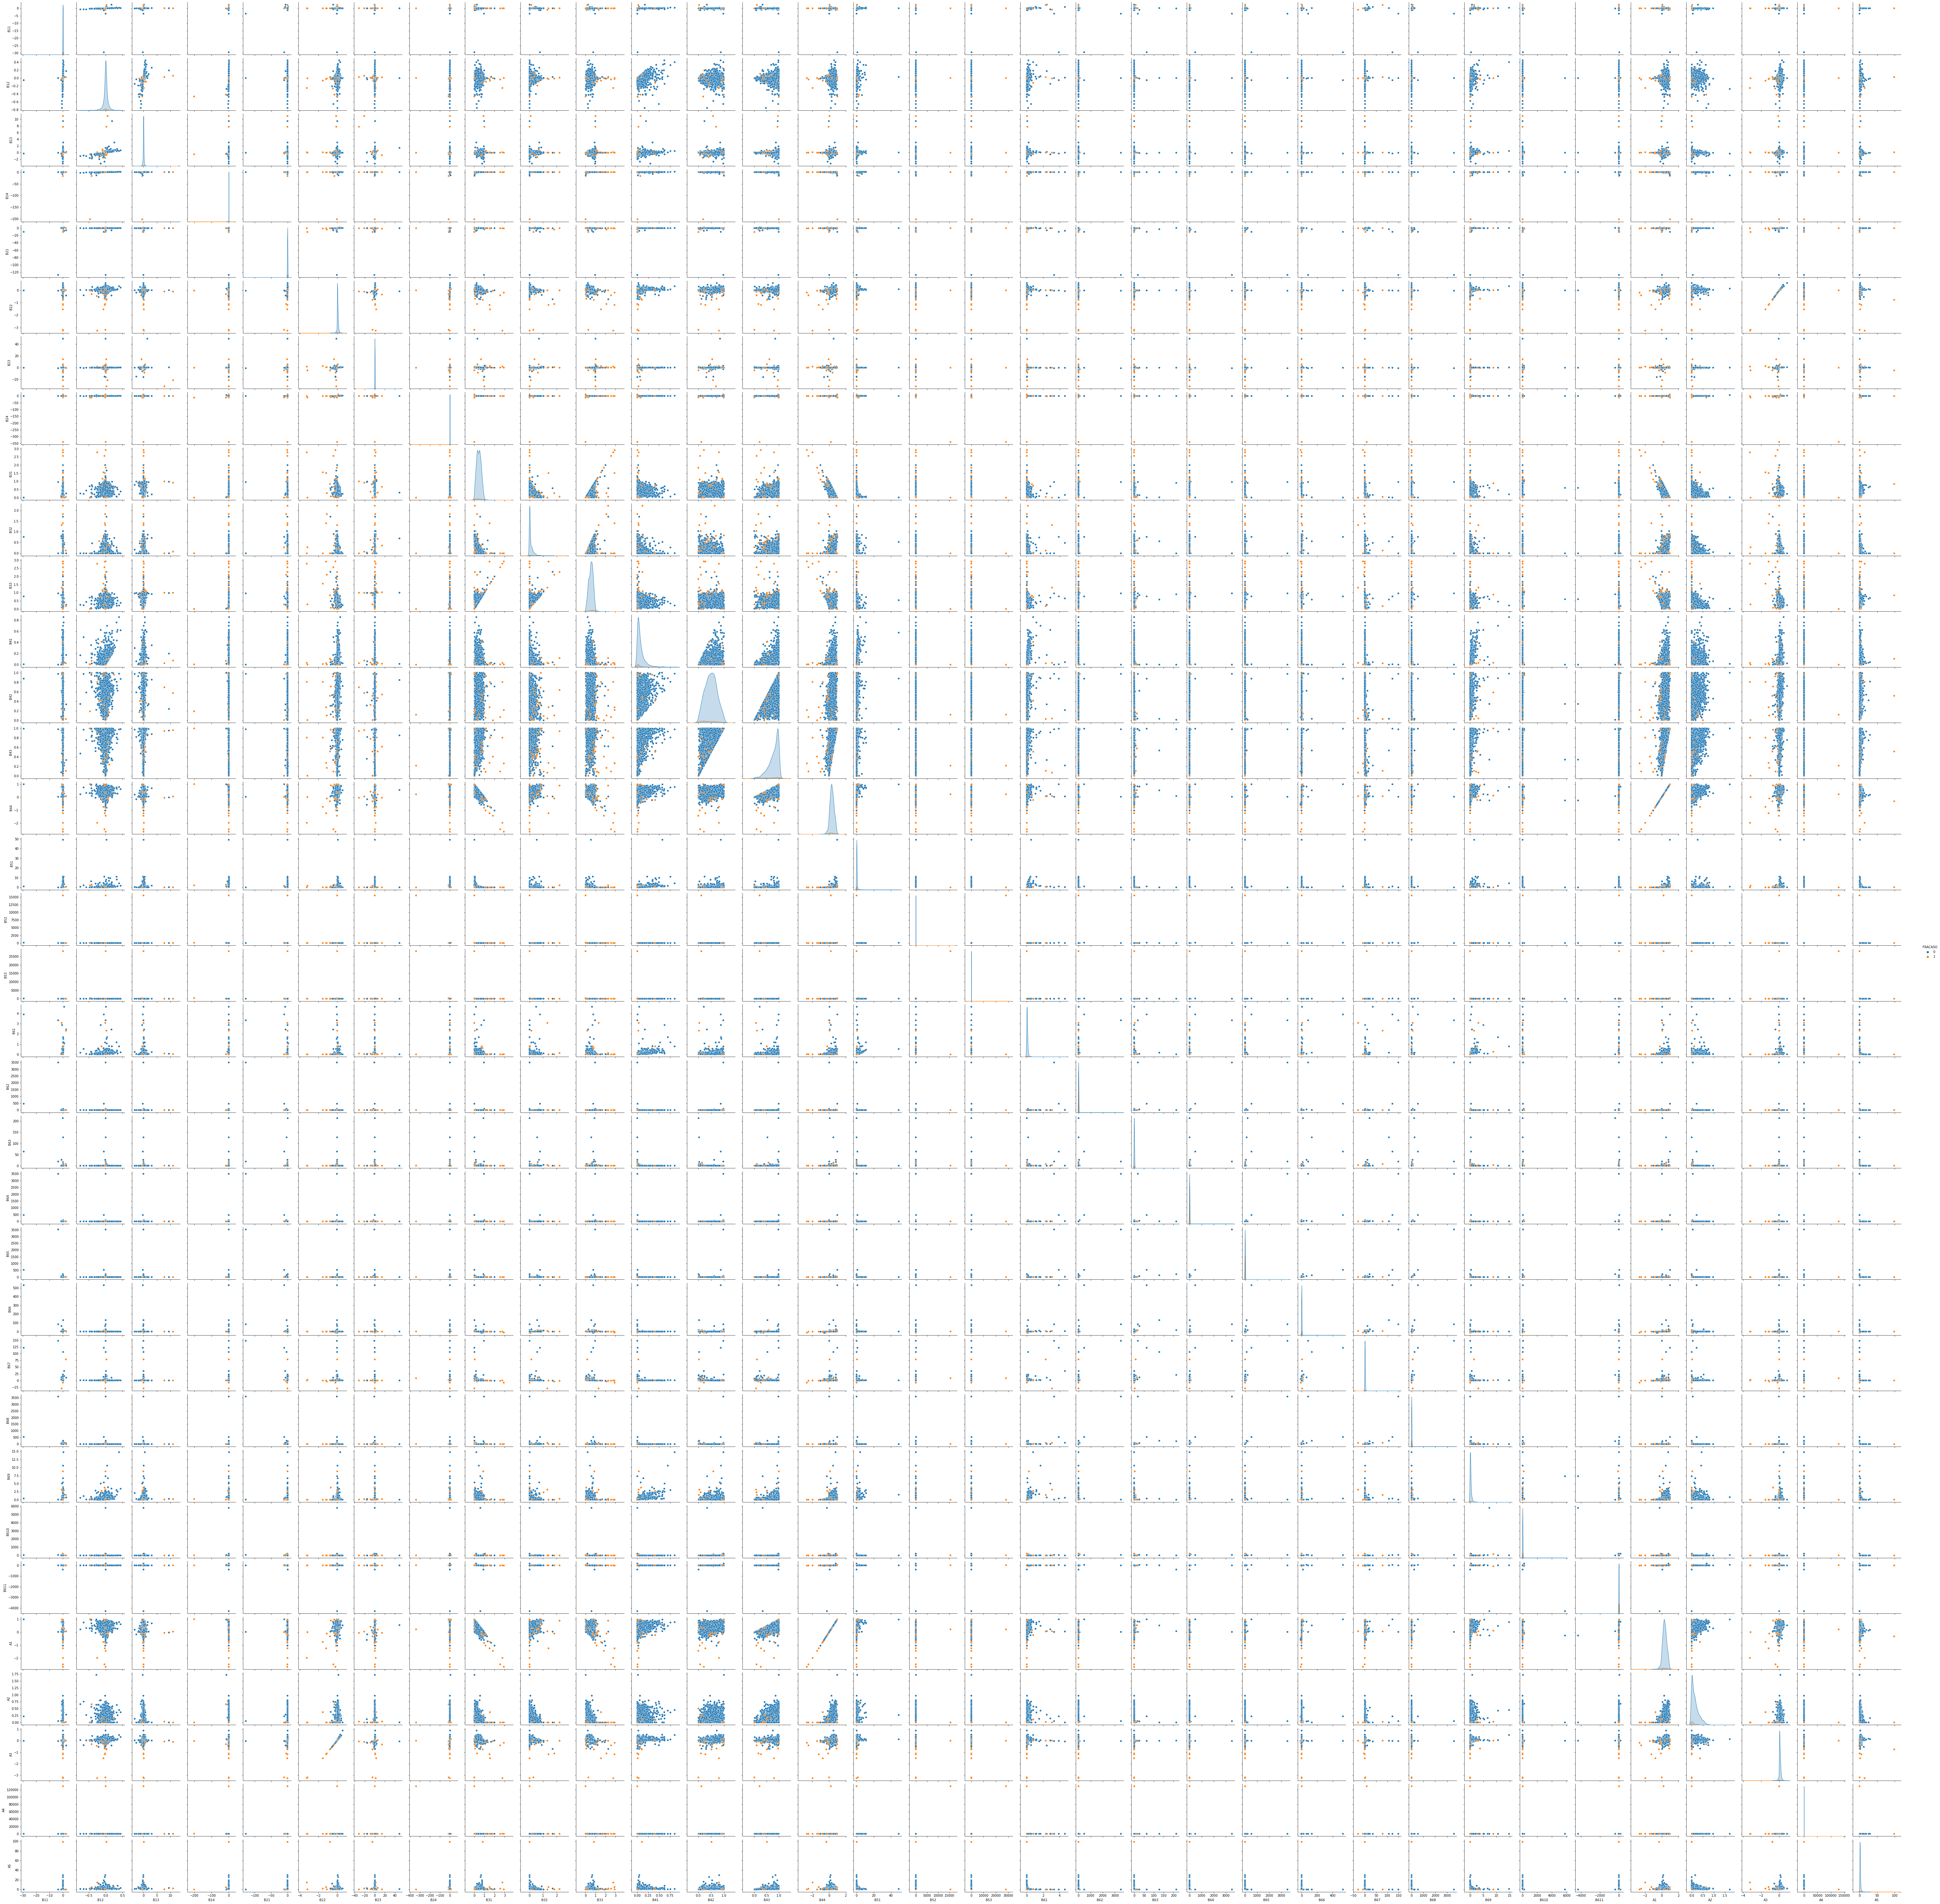

In [ ]:
sns_plot = sns.pairplot(train_df, kind="scatter", hue='FRACASO')
sns_plot

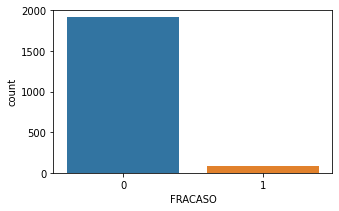

In [ ]:
fig, axes =plt.subplots(1,1, figsize=(5,3))
sns.countplot(x = 'FRACASO', data = train_df, ax=axes)

In [ ]:
train_df['FRACASO'].value_counts()

0    1911
1      89
Name: FRACASO, dtype: int64

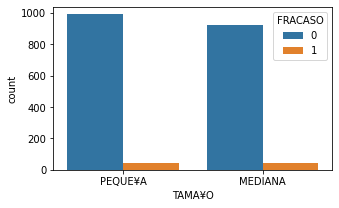

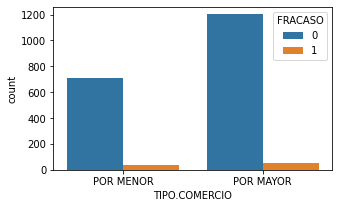

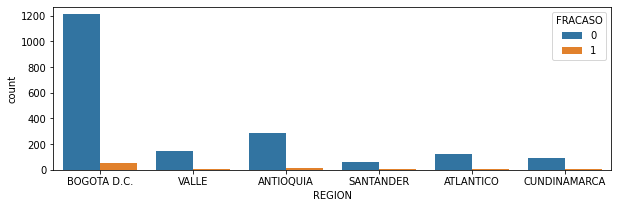

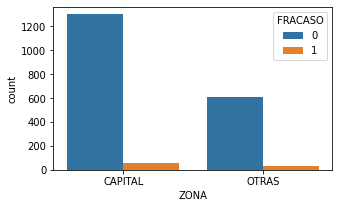

In [ ]:
fig, axes =plt.subplots(1,1, figsize=(5,3))
sns.countplot(x = 'TAMA¥O', data = train_df, ax=axes, hue='FRACASO')
fig, axes =plt.subplots(1,1, figsize=(5,3))
sns.countplot(x = 'TIPO.COMERCIO', data = train_df, ax=axes, hue='FRACASO')
fig, axes =plt.subplots(1,1, figsize=(10,3))
sns.countplot(x = 'REGION', data = train_df, ax=axes, hue='FRACASO')
fig, axes =plt.subplots(1,1, figsize=(5,3))
sns.countplot(x = 'ZONA', data = train_df, ax=axes, hue='FRACASO')


In [ ]:
print(train_df['TAMA¥O'].value_counts())
print(train_df['TIPO.COMERCIO'].value_counts())
print(train_df['REGION'].value_counts())
print(train_df['ZONA'].value_counts())

PEQUE¥A    1034
MEDIANA     966
Name: TAMA¥O, dtype: int64
POR MAYOR    1256
POR MENOR     744
Name: TIPO.COMERCIO, dtype: int64
BOGOTA D.C.     1262
ANTIOQUIA        302
VALLE            149
ATLANTICO        126
CUNDINAMARCA      98
SANTANDER         63
Name: REGION, dtype: int64
CAPITAL    1360
OTRAS       640
Name: ZONA, dtype: int64


## Partición de datos de entrenamiento en entrenamiento/validación



In [ ]:
XTotal_df = train_df.drop(columns=['FRACASO'])
yTotal_df = train_df['FRACASO']

In [ ]:
## Particion de datos de entrenamiento
XTrain_df, XTest_df, yTrain_df, yTest_df = train_test_split(XTotal_df, yTotal_df, test_size=0.33, random_state=101, stratify=yTotal_df)

In [ ]:
print(f"Train: {XTrain_df.shape}")
print(f"Test: {XTest_df.shape}")

Train: (1340, 39)
Test: (660, 39)


In [ ]:
yTrain_df.value_counts()

0    1280
1      60
Name: FRACASO, dtype: int64

In [ ]:
yTest_df.value_counts()

0    631
1     29
Name: FRACASO, dtype: int64

# Preprocesamiento de datos: 
Se utilizan técnicas de transformación de variables y gestión de los datos faltantes para el preprocesamiento de los datos

## Codificación de variables categóricas

In [ ]:
# funciones util
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

# A class to select numerical or categorical columns
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

## Diferentes tipos de codificación de variables categóricas y estandarización de variables numéricas


Uso de variables categóricas + variables numéricas:

* Ordinal Encoding + sin escalado de numéricas (XTrain_ordinal) 
* Ordinal Encoding + escalado de numéricas (XTrain_std_ordinal)
* One-hot Encoding + sin escalado de numéricas (XTrain_ohe)
* One-hot Encoding + escalado de numéricas (XTrain_std_ohe)

Uso de variables de kaggle:
* Sin escalado de numéricas
* Con escalado de numéricas

In [ ]:
categorical_features = ['TAMA¥O', 'TIPO.COMERCIO', 'REGION',
       'ZONA'] 
       
numeric_features = ['B11', 'B12', 'B13', 'B14', 'B21', 'B22', 'B23', 'B24', 'B31', 'B32',
       'B33', 'B41', 'B42', 'B43', 'B44', 'B51', 'B52', 'B53', 'B61', 'B62',
       'B63', 'B64', 'B65', 'B66', 'B67', 'B68', 'B69', 'B610', 'B611', 'A1',
       'A2', 'A3', 'A4', 'A5', 'ACTIVOS']

kaggle_features = ['B11', 'B12', 'B13', 'B14', 'B21', 'B22', 'B23', 'B24', 'B31', 'B32',
       'B33', 'B41', 'B42', 'B43', 'B44', 'B51', 'B52', 'B53', 'B61', 'B62',
       'B63', 'B64', 'B65', 'B66', 'B67', 'B68', 'B69', 'B610', 'B611', 'A1',
       'A2', 'A3', 'A4', 'A5']


numerical_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(numeric_features)),
])

numerical_pipeline_std = Pipeline([
    ("select_numeric", DataFrameSelector(numeric_features)),
    ("std_scaler", StandardScaler()),
])

numerical_pipeline_kaggle = Pipeline([
    ("select_numeric", DataFrameSelector(kaggle_features)),
])

numerical_pipeline_kaggle_std = Pipeline([
    ("select_numeric", DataFrameSelector(kaggle_features)),
    ("std_scaler", StandardScaler()),
])

categorical_pipeline_ohe = Pipeline([
    ("select_cat", DataFrameSelector(categorical_features)),
    ("cat_encoder", CategoricalEncoder(encoding='onehot-dense'))
])

categorical_pipeline_ordinal = Pipeline([
    ("select_cat", DataFrameSelector(categorical_features)),
    ("cat_encoder", CategoricalEncoder(encoding='ordinal'))
])

preprocess_pipeline_with_ordinal_no_scale = FeatureUnion(transformer_list=[
    ("numerical_pipeline", numerical_pipeline),             
    ("categorical_pipeline", categorical_pipeline_ordinal),
])
preprocess_pipeline_with_ordinal_with_scale = FeatureUnion(transformer_list=[
    ("numerical_pipeline", numerical_pipeline_std),
    ("categorical_pipeline", categorical_pipeline_ordinal),
])

preprocess_pipeline_with_ohe_no_scale = FeatureUnion(transformer_list=[
    ("numerical_pipeline", numerical_pipeline),             
    ("categorical_pipeline", categorical_pipeline_ohe),
])
preprocess_pipeline_with_ohe_with_scale = FeatureUnion(transformer_list=[
    ("numerical_pipeline", numerical_pipeline_std),
    ("categorical_pipeline", categorical_pipeline_ohe),
])


preprocess_pipeline_kaggle_no_scale = FeatureUnion(transformer_list=[
    ("numerical_pipeline", numerical_pipeline_kaggle),
])
preprocess_pipeline_kaggle_with_scale = FeatureUnion(transformer_list=[
    ("numerical_pipeline", numerical_pipeline_kaggle_std),
])



XTrain_ordinal = preprocess_pipeline_with_ordinal_no_scale.fit_transform(XTrain_df)
XTest_ordinal = preprocess_pipeline_with_ordinal_no_scale.transform(XTest_df)
XTrain_std_ordinal = preprocess_pipeline_with_ordinal_with_scale.fit_transform(XTrain_df)
XTest_std_ordinal = preprocess_pipeline_with_ordinal_with_scale.transform(XTest_df)

XTrain_ohe = preprocess_pipeline_with_ohe_no_scale.fit_transform(XTrain_df)
XTest_ohe = preprocess_pipeline_with_ohe_no_scale.transform(XTest_df)
XTrain_std_ohe = preprocess_pipeline_with_ohe_with_scale.fit_transform(XTrain_df)
XTest_std_ohe = preprocess_pipeline_with_ohe_with_scale.transform(XTest_df)


XTrain_kaggle = preprocess_pipeline_kaggle_no_scale.fit_transform(XTrain_df)
XTest_kaggle = preprocess_pipeline_kaggle_no_scale.transform(XTest_df)

XTrain_kaggle_std = preprocess_pipeline_kaggle_with_scale.fit_transform(XTrain_df)
XTest_kaggle_std = preprocess_pipeline_kaggle_with_scale.transform(XTest_df)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:112: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:147: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.

In [ ]:
XTrain_ordinal_df = pd.DataFrame(XTrain_ordinal, columns=XTrain_df.columns)
XTest_ordinal_df = pd.DataFrame(XTest_ordinal, columns=XTrain_df.columns)
XTrain_std_ordinal_df = pd.DataFrame(XTrain_std_ordinal, columns=XTrain_df.columns)
XTest_std_ordinal_df = pd.DataFrame(XTest_std_ordinal, columns=XTrain_df.columns)

XTrain_kaggle_df = pd.DataFrame(XTrain_kaggle, columns=kaggle_features)
XTest_kaggle_df = pd.DataFrame(XTest_kaggle, columns=kaggle_features)
XTrain_kaggle_std_df = pd.DataFrame(XTrain_kaggle_std, columns=kaggle_features)
XTest_kaggle_std_df = pd.DataFrame(XTest_kaggle_std, columns=kaggle_features)

columns_ohe = np.array([])
for i in categorical_pipeline_ohe[1].categories_:
  columns_ohe = np.append(columns_ohe, i)

columns_ohe = columns_ohe.tolist()

XTrain_ohe_df = pd.DataFrame(XTrain_ohe, columns=(numeric_features+columns_ohe))
XTest_ohe_df = pd.DataFrame(XTest_ohe, columns=(numeric_features+columns_ohe))
XTrain_std_ohe_df = pd.DataFrame(XTrain_std_ohe, columns=(numeric_features+columns_ohe))
XTest_std_ohe_df = pd.DataFrame(XTest_std_ohe, columns=(numeric_features+columns_ohe))



## Imputación de datos faltantes

In [ ]:
train_df.isnull().sum()

B11              19
B12               0
B13               0
B14               0
B21              19
B22               0
B23               0
B24               0
B31               0
B32               0
B33               0
B41               0
B42               0
B43               0
B44               0
B51               2
B52               2
B53               2
B61              19
B62              19
B63              19
B64              19
B65              19
B66              19
B67              19
B68              19
B69               5
B610              5
B611              5
A1                0
A2                0
A3                0
A4                0
A5                0
ACTIVOS           0
TAMA¥O            0
TIPO.COMERCIO     0
REGION            0
ZONA              0
FRACASO           0
dtype: int64

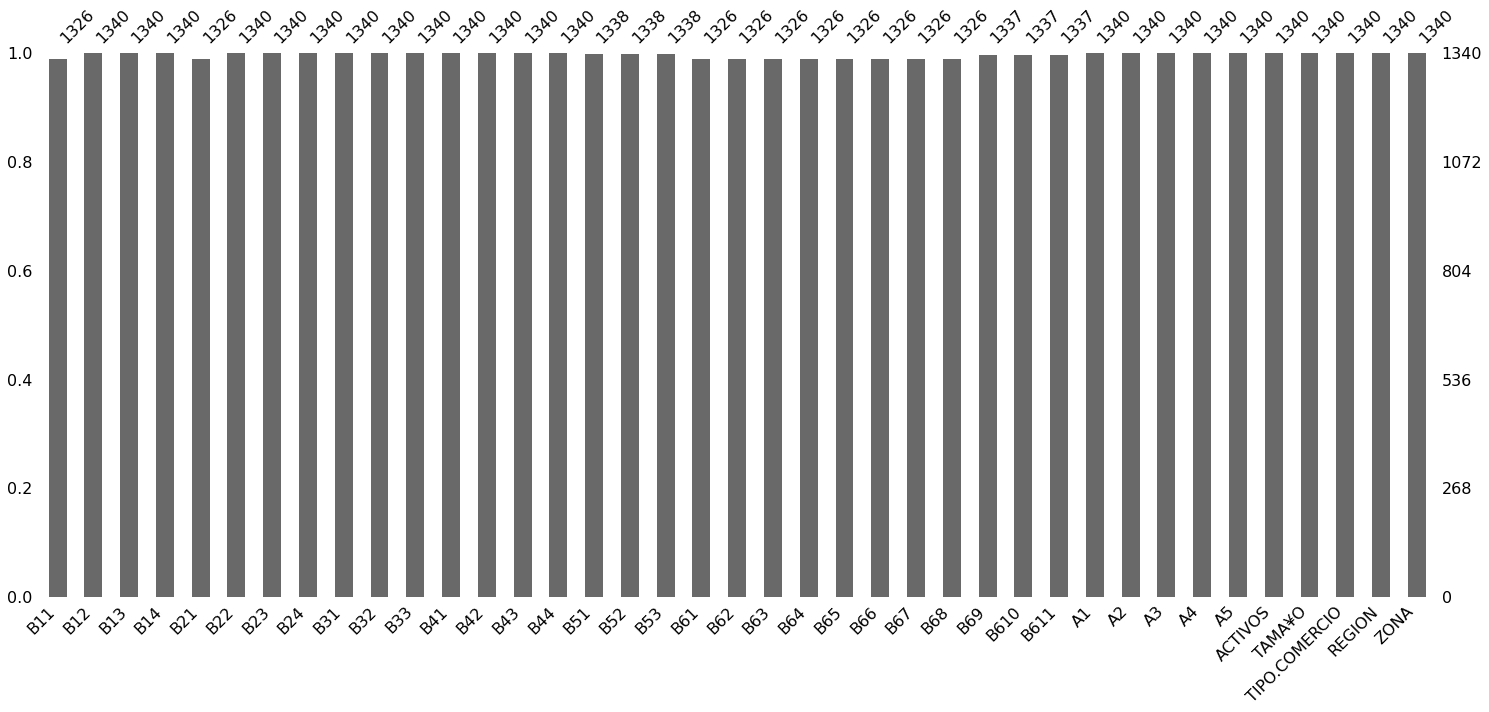

In [ ]:
msno.bar(XTrain_df)

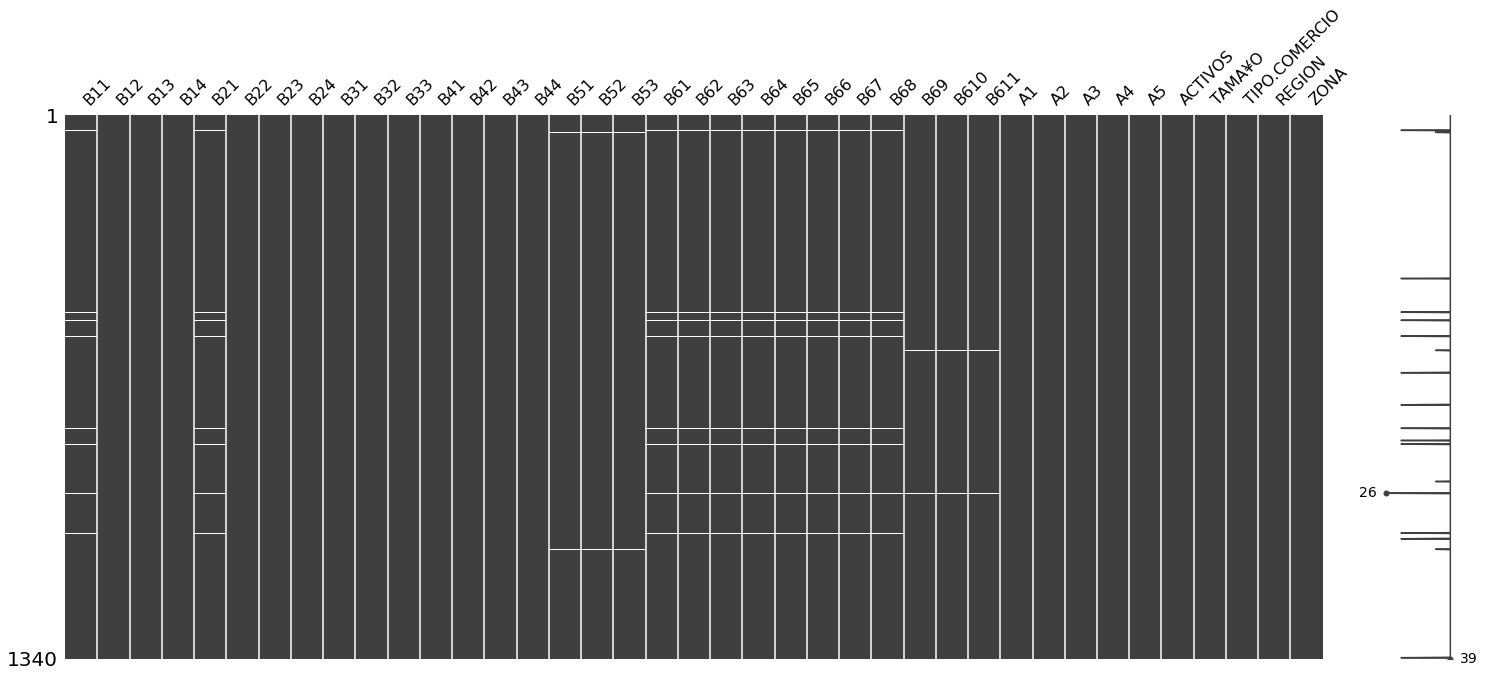

In [ ]:
msno.matrix(XTrain_df)

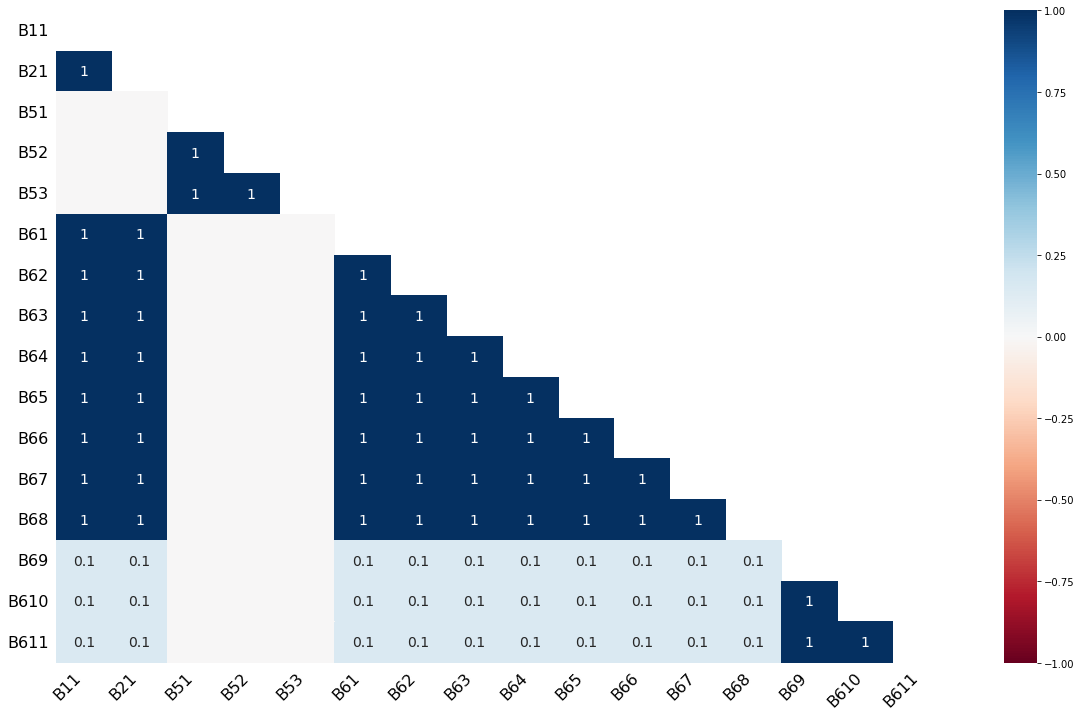

In [ ]:
msno.heatmap(XTrain_df)

Analisis de los datos faltantes:

Alguna imputacion:

In [ ]:
# ordinal encoding
imp_mult_ordinal = KNNImputer(n_neighbors=4)
imp_mult_ordinal.fit(XTrain_ordinal_df)
XTrain_ordinal_imp_df = pd.DataFrame(imp_mult_ordinal.transform(XTrain_ordinal_df), columns=XTrain_ordinal_df.columns)
XTest_ordinal_imp_df = pd.DataFrame(imp_mult_ordinal.transform(XTest_ordinal_df), columns=XTest_ordinal_df.columns)

imp_mult_std_ordinal = KNNImputer(n_neighbors=4)
imp_mult_std_ordinal.fit(XTrain_std_ordinal_df)
XTrain_std_ordinal_imp_df = pd.DataFrame(imp_mult_std_ordinal.transform(XTrain_std_ordinal_df), columns=XTrain_std_ordinal_df.columns)
XTest_std_ordinal_imp_df = pd.DataFrame(imp_mult_std_ordinal.transform(XTest_std_ordinal_df), columns=XTest_std_ordinal_df.columns)

# Ohe encoding
imp_mult_std_ohe = KNNImputer(n_neighbors=4)
imp_mult_std_ohe.fit(XTrain_std_ohe_df)
XTrain_std_ohe_imp_df = pd.DataFrame(imp_mult_std_ohe.transform(XTrain_std_ohe_df), columns=XTrain_std_ohe_df.columns)
XTest_std_ohe_imp_df = pd.DataFrame(imp_mult_std_ohe.transform(XTest_std_ohe_df), columns=XTest_std_ohe_df.columns)

imp_mult_ohe = KNNImputer(n_neighbors=4)
imp_mult_ohe.fit(XTrain_ohe_df)
XTrain_ohe_imp_df = pd.DataFrame(imp_mult_ohe.transform(XTrain_ohe_df), columns=XTrain_ohe_df.columns)
XTest_ohe_imp_df = pd.DataFrame(imp_mult_ohe.transform(XTest_ohe_df), columns=XTest_ohe_df.columns)


# kaggle features
imp_mult = KNNImputer(n_neighbors=4)
imp_mult.fit(XTrain_kaggle_df)
XTrain_kaggle_imp_df = pd.DataFrame(imp_mult.transform(XTrain_kaggle_df), columns=XTrain_kaggle_df.columns)
XTest_kaggle_imp_df = pd.DataFrame(imp_mult.transform(XTest_kaggle_df), columns=XTest_kaggle_df.columns)

imp_mult_std = KNNImputer(n_neighbors=4)
imp_mult_std.fit(XTrain_kaggle_std_df)
XTrain_kaggle_std_imp_df = pd.DataFrame(imp_mult_std.transform(XTrain_kaggle_std_df), columns=XTrain_kaggle_std_df.columns)
XTest_kaggle_std_imp_df = pd.DataFrame(imp_mult_std.transform(XTest_kaggle_std_df), columns=XTest_kaggle_std_df.columns)



## Ingeniería de features

In [ ]:
print(XTrain_df.describe())

               B11          B12          B13          B14          B21  \
count  1326.000000  1340.000000  1340.000000  1340.000000  1326.000000   
mean     -0.026354    -0.003118     0.012499    -0.196513     0.005802   
std       0.815945     0.083128     0.471453     5.547868     0.389144   
min     -29.432146    -0.754133    -3.268558  -201.403626   -10.115730   
25%      -0.014895    -0.020552    -0.048001    -0.042384     0.008038   
50%       0.000840     0.001026     0.002945     0.001818     0.025499   
75%       0.016202     0.022687     0.060183     0.044449     0.051353   
max       2.221985     0.445175    11.003726     1.956962     2.150315   

               B22          B23          B24          B31          B32  \
count  1340.000000  1340.000000  1340.000000  1340.000000  1340.000000   
mean      0.036481     0.118657    -0.152497     0.449231     0.092297   
std       0.133299     1.512472     9.306588     0.244622     0.171459   
min      -3.243274   -21.052697  -339

como observamos el dataset esta muy desbalanceado en la variable de prediccion, como nos importa predecir ambas clases correctamente aplicamos un metodo de balanceo.

In [ ]:
yTrain_df.value_counts()

0    1280
1      60
Name: FRACASO, dtype: int64

### Balanceo de datos

In [ ]:
# ordinal
oversample = SMOTENC(categorical_features=[35,36,37,38], sampling_strategy=0.3)
XTrain_ordinal_balanced_df, yTrain_ordinal_balanced_df = oversample.fit_resample(XTrain_ordinal_imp_df, yTrain_df)
XTrain_std_ordinal_balanced_df, yTrain_std_ordinal_balanced_df = oversample.fit_resample(XTrain_std_ordinal_imp_df, yTrain_df)

#ohe
oversample = SMOTENC(categorical_features=[35,36,37,38,39,40,41,42,43,44,45,46], sampling_strategy=0.3)
XTrain_ohe_balanced_df, yTrain_ohe_balanced_df = oversample.fit_resample(XTrain_ohe_imp_df, yTrain_df)
XTrain_std_ohe_balanced_df, yTrain_std_ohe_balanced_df = oversample.fit_resample(XTrain_std_ohe_imp_df, yTrain_df)

#kaggle
oversample = SMOTE(sampling_strategy=0.3)
XTrain_kaggle_balanced_df, yTrain_kaggle_balanced_df = oversample.fit_resample(XTrain_kaggle_imp_df, yTrain_df)
XTrain_kaggle_std_balanced_df, yTrain_kaggle_std_balanced_df = oversample.fit_resample(XTrain_kaggle_std_imp_df, yTrain_df)

In [ ]:
yTrain_df.value_counts()

0    1280
1      60
Name: FRACASO, dtype: int64

In [ ]:
yTrain_kaggle_balanced_df.value_counts()

0    1280
1     384
Name: FRACASO, dtype: int64

### PCA

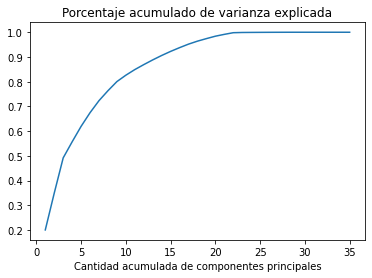

# componentes: 20, varianza explicada:  0.9840159773479552



In [ ]:
# PCA: Ohe + std
p = XTrain_std_ohe_balanced_df[numeric_features].shape[1]
pca = PCA(n_components=p)
ZTrain = pca.fit_transform(XTrain_std_ohe_balanced_df[numeric_features])

plt.plot(range(1,p+1),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Cantidad acumulada de componentes principales')
plt.title('Porcentaje acumulado de varianza explicada')
plt.show()

pca_variance = PCA(n_components=0.98, svd_solver='full')
ZTrain = pca_variance.fit_transform(XTrain_std_ohe_balanced_df[numeric_features])

ZTest = pca_variance.transform(XTest_std_ohe_imp_df[numeric_features])

print('# componentes: {}, varianza explicada:  {}\n'.format(len(pca_variance.components_), 
                                                       pca_variance.explained_variance_ratio_.sum()))


label_pca_componentes = ["PC-" +str(x) for x in range(0, len(pca_variance.components_))]
ZTrain_df = pd.DataFrame(ZTrain, columns = label_pca_componentes)
ZTest_df = pd.DataFrame(ZTest, columns = label_pca_componentes)


ZTrain_std_ohe_balanced_df = pd.concat([ZTrain_df, XTrain_std_ohe_balanced_df[columns_ohe]],  axis=1)
ZTest_std_ohe_imp_df = pd.concat([ZTest_df, XTest_std_ohe_imp_df[columns_ohe]],  axis=1)



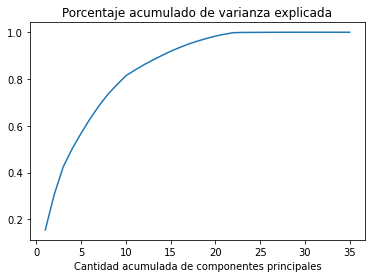

# componentes: 20, varianza explicada:  0.9835003778116893



In [ ]:
# PCA: ordinal + std
p = XTrain_std_ordinal_balanced_df[numeric_features].shape[1]
pca = PCA(n_components=p)
ZTrain = pca.fit_transform(XTrain_std_ordinal_balanced_df[numeric_features])

plt.plot(range(1,p+1),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Cantidad acumulada de componentes principales')
plt.title('Porcentaje acumulado de varianza explicada')
plt.show()

pca_variance = PCA(n_components=0.98, svd_solver='full')
ZTrain = pca_variance.fit_transform(XTrain_std_ordinal_balanced_df[numeric_features])

ZTest = pca_variance.transform(XTest_std_ordinal_imp_df[numeric_features])

print('# componentes: {}, varianza explicada:  {}\n'.format(len(pca_variance.components_), 
                                                       pca_variance.explained_variance_ratio_.sum()))


label_pca_componentes = ["PC-" +str(x) for x in range(0, len(pca_variance.components_))]
ZTrain_df = pd.DataFrame(ZTrain, columns = label_pca_componentes)
ZTest_df = pd.DataFrame(ZTest, columns = label_pca_componentes)


ZTrain_std_ordinal_balanced_df = pd.concat([ZTrain_df, XTrain_std_ordinal_balanced_df[categorical_features]],  axis=1)
ZTest_std_ordinal_imp_df = pd.concat([ZTest_df, XTest_std_ordinal_imp_df[categorical_features]],  axis=1)

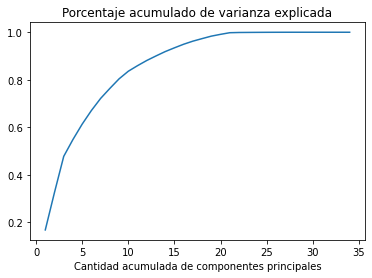

# componentes: 19, varianza explicada:  0.9835857497605527



In [ ]:
# PCA: kaggle + std
p = XTrain_kaggle_std_balanced_df.shape[1]
pca = PCA(n_components=p)
ZTrain = pca.fit_transform(XTrain_kaggle_std_balanced_df)

plt.plot(range(1,p+1),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Cantidad acumulada de componentes principales')
plt.title('Porcentaje acumulado de varianza explicada')
plt.show()

pca_variance = PCA(n_components=0.98, svd_solver='full')
ZTrain = pca_variance.fit_transform(XTrain_kaggle_std_balanced_df)

ZTest = pca_variance.transform(XTest_kaggle_std_imp_df)

print('# componentes: {}, varianza explicada:  {}\n'.format(len(pca_variance.components_), 
                                                       pca_variance.explained_variance_ratio_.sum()))


label_pca_componentes = ["PC-" +str(x) for x in range(0, len(pca_variance.components_))]
ZTrain_df = pd.DataFrame(ZTrain, columns = label_pca_componentes)
ZTest_df = pd.DataFrame(ZTest, columns = label_pca_componentes)


ZTrain_kaggle_std_balanced_df = ZTrain_df
ZTest_kaggle_std_imp_df = ZTest_df

# Selección y Extracción de variables: 
Se utiliza el método forward, backward o exhaustive para la extracción y selección de variables

## Método de filtrado
Se eliminan variables correlacionadas y se elige la que mejor correlación tiene con la salida

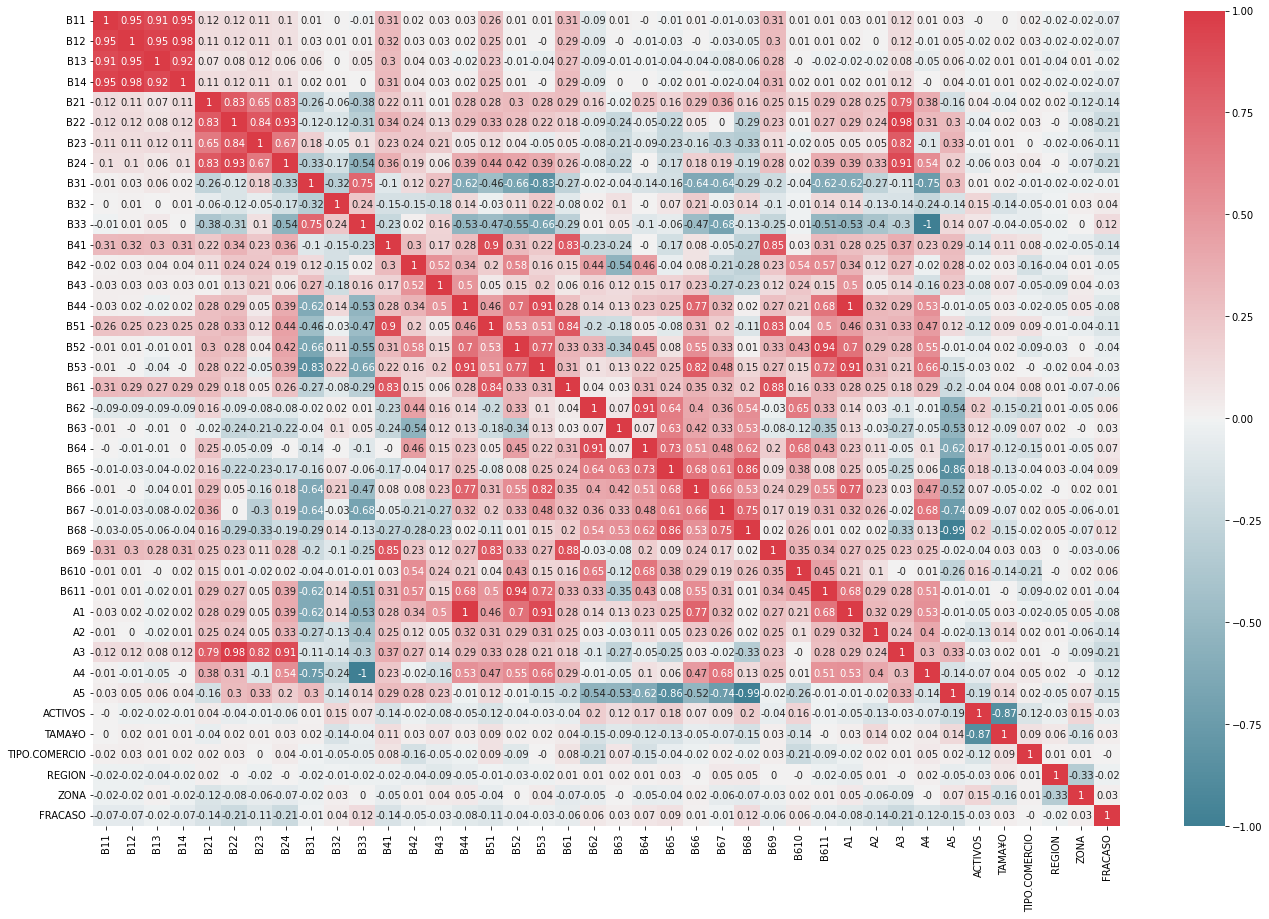

In [ ]:
train_ordinal_imp_df = pd.concat([XTrain_ordinal_imp_df, pd.DataFrame(yTrain_df).reset_index(drop=True)], axis=1)

correlation_matrix = train_ordinal_imp_df.corr(method='spearman').round(2)
fig,axes = plt.subplots(1,1,figsize=(23,15))
sns.heatmap(data=correlation_matrix, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True,ax=axes)

In [ ]:
selected_features_uncorrelated1 = ['B11', 'B31', 'B32', 'B41','B42', 'B43', 'B52', 'A1', 'B62', 'B63', 'B610', 'A2', 'A3', 'A4', 'A5']
selected_features_uncorrelated2 = ['B11', 'B31', 'B32', 'B41','B42', 'B43', 'B52', 'A1', 'B62', 'B63', 'B610', 'A2', 'A3', 'A4', 'A5', 'ACTIVOS', 'TIPO.COMERCIO', 'REGION', 'ZONA']
selected_features_uncorrelated3 = ['B11', 'B31', 'B32', 'B41','B42', 'B43', 'B52', 'A1', 'B62', 'B63', 'B610', 'A2', 'A3', 'A4', 'A5', 'ACTIVOS', 'POR MAYOR', 'POR MENOR', 'ANTIOQUIA', 'ATLANTICO', 'BOGOTA D.C.', 'CUNDINAMARCA', 'SANTANDER', 'VALLE', 'CAPITAL', 'OTRAS']

#kaggle
XTrain_kaggle_balanced_s1_df = XTrain_kaggle_balanced_df[selected_features_uncorrelated1]
XTrain_kaggle_std_balanced_s1_df = XTrain_kaggle_std_balanced_df[selected_features_uncorrelated1]

#ordinal
XTrain_ordinal_balanced_s1_df = XTrain_ordinal_balanced_df[selected_features_uncorrelated2]
XTrain_std_ordinal_balanced_s1_df = XTrain_std_ordinal_balanced_df[selected_features_uncorrelated2]

#ohe
XTrain_ohe_balanced_s1_df = XTrain_ohe_balanced_df[selected_features_uncorrelated3]
XTrain_std_ohe_balanced_s1_df = XTrain_std_ohe_balanced_df[selected_features_uncorrelated3]



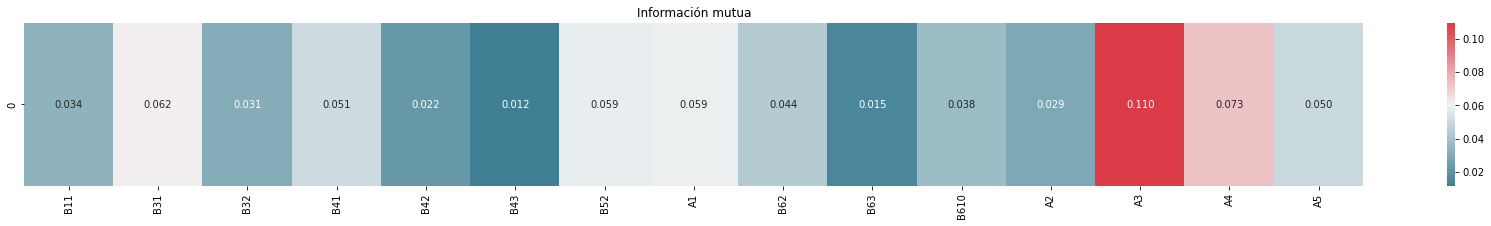

In [ ]:
#kaggle
mu_inf = mutual_info_classif(XTrain_kaggle_balanced_s1_df, yTrain_kaggle_balanced_df.values,discrete_features=False)

fig, ax = plt.subplots(1,1, figsize=(30,3))
ax.set_title('Información mutua')
sns.heatmap([mu_inf],ax=ax,cmap=sns.diverging_palette(220,10,as_cmap=True), annot=True,fmt=".3f")
ax.set_xticklabels(selected_features_uncorrelated1)
ax.tick_params(axis='x', rotation=90)

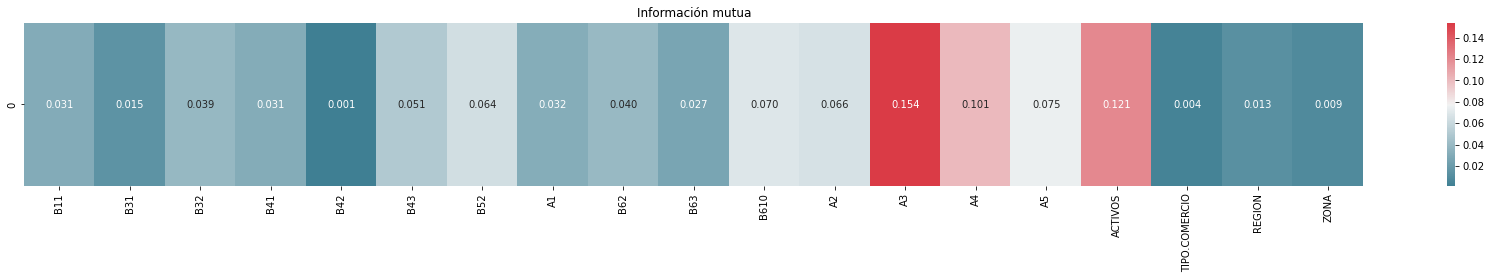

In [ ]:
# ordinal
mu_inf = mutual_info_classif(XTrain_ordinal_balanced_s1_df, yTrain_ordinal_balanced_df.values,discrete_features=False)

fig, ax = plt.subplots(1,1, figsize=(30,3))
ax.set_title('Información mutua')
sns.heatmap([mu_inf],ax=ax,cmap=sns.diverging_palette(220,10,as_cmap=True), annot=True,fmt=".3f")
ax.set_xticklabels(selected_features_uncorrelated2)
ax.tick_params(axis='x', rotation=90)

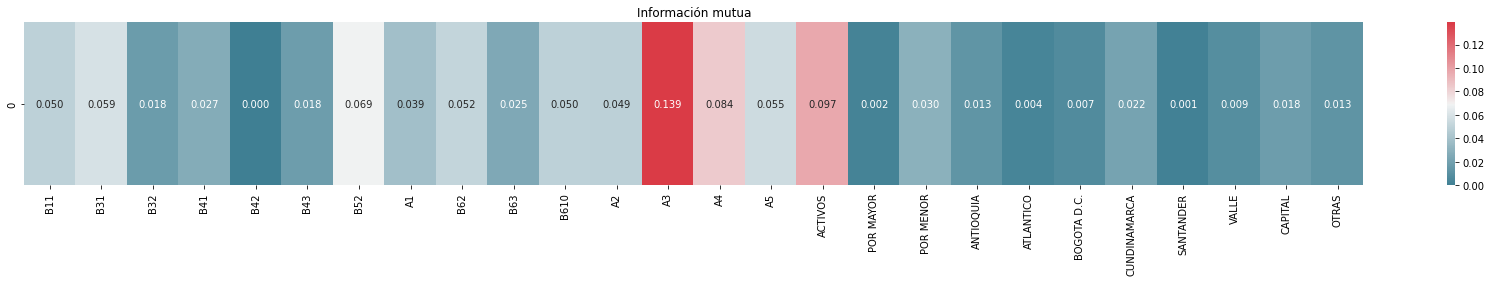

In [ ]:
#ohe
mu_inf = mutual_info_classif(XTrain_ohe_balanced_s1_df, yTrain_ohe_balanced_df.values,discrete_features=False)

fig, ax = plt.subplots(1,1, figsize=(30,3))
ax.set_title('Información mutua')
sns.heatmap([mu_inf],ax=ax,cmap=sns.diverging_palette(220,10,as_cmap=True), annot=True,fmt=".3f")
ax.set_xticklabels(selected_features_uncorrelated3)
ax.tick_params(axis='x', rotation=90)

In [ ]:
#kaggle
selectKbest_mi_kaggle = SelectKBest(mutual_info_classif, k=10)
selectKbest_mi_kaggle.fit(XTrain_kaggle_balanced_s1_df, yTrain_kaggle_balanced_df.values)

print("Variables seleccionadas: {}".format(np.array(selected_features_uncorrelated1)[selectKbest_mi_kaggle.get_support()]))

XTrain_kaggle_balanced_s2_df = XTrain_kaggle_balanced_s1_df.iloc[:, selectKbest_mi_kaggle.get_support()]
XTrain_kaggle_std_balanced_s2_df = XTrain_kaggle_std_balanced_s1_df.iloc[:, selectKbest_mi_kaggle.get_support()]


Variables seleccionadas: ['B31' 'B41' 'B52' 'A1' 'B62' 'B610' 'A2' 'A3' 'A4' 'A5']


In [ ]:
#ordinal
selectKbest_mi_ordinal = SelectKBest(mutual_info_classif, k=15)
selectKbest_mi_ordinal.fit(XTrain_ordinal_balanced_s1_df, yTrain_ordinal_balanced_df.values)

print("Variables seleccionadas: {}".format(np.array(selected_features_uncorrelated2)[selectKbest_mi_ordinal.get_support()]))

XTrain_ordinal_balanced_s2_df = XTrain_ordinal_balanced_s1_df.iloc[:, selectKbest_mi_ordinal.get_support()]
XTrain_std_ordinal_balanced_s2_df = XTrain_std_ordinal_balanced_s1_df.iloc[:, selectKbest_mi_ordinal.get_support()]

Variables seleccionadas: ['B11' 'B32' 'B41' 'B43' 'B52' 'A1' 'B62' 'B63' 'B610' 'A2' 'A3' 'A4' 'A5'
 'ACTIVOS' 'REGION']


In [ ]:
#ohe
selectKbest_mi_ohe = SelectKBest(mutual_info_classif, k=20)
selectKbest_mi_ohe.fit(XTrain_ohe_balanced_s1_df, yTrain_ohe_balanced_df.values)

print("Variables seleccionadas: {}".format(np.array(selected_features_uncorrelated3)[selectKbest_mi_ohe.get_support()]))

XTrain_ohe_balanced_s2_df = XTrain_ohe_balanced_s1_df.iloc[:, selectKbest_mi_ohe.get_support()]
XTrain_std_ohe_balanced_s2_df = XTrain_std_ohe_balanced_s1_df.iloc[:, selectKbest_mi_ohe.get_support()]

Variables seleccionadas: ['B11' 'B31' 'B32' 'B41' 'B43' 'B52' 'A1' 'B62' 'B63' 'B610' 'A2' 'A3'
 'A4' 'A5' 'ACTIVOS' 'POR MAYOR' 'ANTIOQUIA' 'CUNDINAMARCA' 'SANTANDER'
 'OTRAS']


## Método de envoltura

Boruta

In [ ]:
#kaggle
rf = RandomForestClassifier()
rf.fit(XTrain_kaggle_balanced_df.values, yTrain_kaggle_balanced_df.values)

feat_selector_kaggle = BorutaPy(rf, n_estimators='auto', random_state=1)
feat_selector_kaggle.fit(XTrain_kaggle_balanced_df.values, yTrain_kaggle_balanced_df.values)
print("variables seleccionadas: {}".format(XTrain_kaggle_balanced_df.columns.to_numpy()[feat_selector_kaggle.support_]))

XTrain_kaggle_balanced_s3_df = XTrain_kaggle_balanced_df.iloc[:, feat_selector_kaggle.support_]
XTrain_kaggle_std_balanced_s3_df = XTrain_kaggle_std_balanced_df.iloc[:, feat_selector_kaggle.support_]

variables seleccionadas: ['B11' 'B12' 'B13' 'B14' 'B21' 'B22' 'B23' 'B24' 'B31' 'B32' 'B33' 'B41'
 'B42' 'B43' 'B44' 'B51' 'B52' 'B53' 'B61' 'B62' 'B63' 'B64' 'B65' 'B66'
 'B67' 'B68' 'B69' 'B610' 'B611' 'A1' 'A2' 'A3' 'A4' 'A5']


In [ ]:
#ordinal
rf = RandomForestClassifier()
rf.fit(XTrain_ordinal_balanced_df.values, yTrain_ordinal_balanced_df.values)

feat_selector_ordinal = BorutaPy(rf, n_estimators='auto', random_state=1)
feat_selector_ordinal.fit(XTrain_ordinal_balanced_df.values, yTrain_ordinal_balanced_df.values)
print("variables seleccionadas: {}".format(XTrain_ordinal_balanced_df.columns.to_numpy()[feat_selector_ordinal.support_]))

XTrain_ordinal_balanced_s3_df = XTrain_ordinal_balanced_df.iloc[:, feat_selector_ordinal.support_]
XTrain_std_ordinal_balanced_s3_df = XTrain_std_ordinal_balanced_df.iloc[:, feat_selector_ordinal.support_]

variables seleccionadas: ['B11' 'B12' 'B13' 'B14' 'B21' 'B22' 'B23' 'B24' 'B31' 'B32' 'B33' 'B41'
 'B42' 'B43' 'B44' 'B52' 'B53' 'B61' 'B62' 'B63' 'B64' 'B65' 'B66' 'B67'
 'B68' 'B69' 'B610' 'B611' 'A1' 'A2' 'A3' 'A4' 'A5' 'ACTIVOS']


In [ ]:
#ohe
rf = RandomForestClassifier()
rf.fit(XTrain_ohe_balanced_df.values, yTrain_ohe_balanced_df.values)

feat_selector_ohe = BorutaPy(rf, n_estimators='auto', random_state=1)
feat_selector_ohe.fit(XTrain_ohe_balanced_df.values, yTrain_ohe_balanced_df.values)
print("variables seleccionadas: {}".format(XTrain_ohe_balanced_df.columns.to_numpy()[feat_selector_ohe.support_]))

XTrain_ohe_balanced_s3_df = XTrain_ohe_balanced_df.iloc[:, feat_selector_ohe.support_]
XTrain_std_ohe_balanced_s3_df = XTrain_std_ohe_balanced_df.iloc[:, feat_selector_ohe.support_]

variables seleccionadas: ['B11' 'B12' 'B13' 'B14' 'B21' 'B22' 'B23' 'B24' 'B31' 'B32' 'B33' 'B41'
 'B42' 'B43' 'B44' 'B52' 'B53' 'B61' 'B62' 'B63' 'B64' 'B65' 'B66' 'B67'
 'B68' 'B69' 'B610' 'B611' 'A1' 'A2' 'A3' 'A4' 'A5' 'ACTIVOS']


RFE

In [ ]:
#kaggle
rfe_kaggle = RFE(estimator=RandomForestClassifier(), n_features_to_select=10, step=1)
rfe_kaggle = rfe_kaggle.fit(XTrain_kaggle_balanced_df.values, yTrain_kaggle_balanced_df.values) 
print("variables seleccionadas: {}".format(XTrain_kaggle_balanced_df.columns.to_numpy()[rfe_kaggle.support_]))

XTrain_kaggle_balanced_s4_df = XTrain_kaggle_balanced_df.iloc[:, rfe_kaggle.support_]
XTrain_kaggle_std_balanced_s4_df = XTrain_kaggle_std_balanced_df.iloc[:, rfe_kaggle.support_]

variables seleccionadas: ['B21' 'B22' 'B23' 'B24' 'B31' 'B33' 'B68' 'B611' 'A3' 'A4']


In [ ]:
#ordinal
rfe_ordinal = RFE(estimator=RandomForestClassifier(), n_features_to_select=15, step=1)
rfe_ordinal = rfe_ordinal.fit(XTrain_ordinal_balanced_df.values, yTrain_ordinal_balanced_df.values) 
print("variables seleccionadas: {}".format(XTrain_ordinal_balanced_df.columns.to_numpy()[rfe_ordinal.support_]))

XTrain_ordinal_balanced_s4_df = XTrain_ordinal_balanced_df.iloc[:, rfe_ordinal.support_]
XTrain_std_ordinal_balanced_s4_df = XTrain_std_ordinal_balanced_df.iloc[:, rfe_ordinal.support_]

variables seleccionadas: ['B21' 'B22' 'B23' 'B24' 'B33' 'B53' 'B65' 'B67' 'B68' 'B610' 'B611' 'A3'
 'A4' 'A5' 'ACTIVOS']


In [ ]:
#ohe
rfe_ohe = RFE(estimator=RandomForestClassifier(), n_features_to_select=20, step=1)
rfe_ohe = rfe_ohe.fit(XTrain_ohe_balanced_df.values, yTrain_ohe_balanced_df.values) 
print("variables seleccionadas: {}".format(XTrain_ohe_balanced_df.columns.to_numpy()[rfe_ohe.support_]))

XTrain_ohe_balanced_s4_df = XTrain_ohe_balanced_df.iloc[:, rfe_ohe.support_]
XTrain_std_ohe_balanced_s4_df = XTrain_std_ohe_balanced_df.iloc[:, rfe_ohe.support_]

variables seleccionadas: ['B13' 'B21' 'B22' 'B23' 'B24' 'B31' 'B33' 'B52' 'B53' 'B61' 'B63' 'B64'
 'B65' 'B68' 'B610' 'B611' 'A3' 'A4' 'A5' 'ACTIVOS']


SelectFromModel

In [ ]:
#kaggle
sfm_kaggle = SelectFromModel(estimator=RandomForestClassifier())
sfm_kaggle.fit(XTrain_kaggle_balanced_df.values, yTrain_kaggle_balanced_df.values)
print("variables seleccionadas: {}".format(XTrain_kaggle_balanced_df.columns.to_numpy()[sfm_kaggle.get_support()]))

XTrain_kaggle_balanced_s5_df = XTrain_kaggle_balanced_df.iloc[:, sfm_kaggle.get_support()]
XTrain_kaggle_std_balanced_s5_df = XTrain_kaggle_std_balanced_df.iloc[:, sfm_kaggle.get_support()]

variables seleccionadas: ['B21' 'B22' 'B23' 'B24' 'B31' 'B33' 'B65' 'B68' 'B611' 'A3' 'A4' 'A5']


In [ ]:
#ordinal
sfm_ordinal = SelectFromModel(estimator=RandomForestClassifier())
sfm_ordinal.fit(XTrain_ordinal_balanced_df.values, yTrain_ordinal_balanced_df.values)
print("variables seleccionadas: {}".format(XTrain_ordinal_balanced_df.columns.to_numpy()[sfm_ordinal.get_support()]))

XTrain_ordinal_balanced_s5_df = XTrain_ordinal_balanced_df.iloc[:, sfm_ordinal.get_support()]
XTrain_std_ordinal_balanced_s5_df = XTrain_std_ordinal_balanced_df.iloc[:, sfm_ordinal.get_support()]

variables seleccionadas: ['B21' 'B22' 'B23' 'B24' 'B33' 'B65' 'B67' 'B68' 'B610' 'B611' 'A3' 'A4'
 'A5' 'ACTIVOS']


In [ ]:
#ohe
sfm_ohe = SelectFromModel(estimator=RandomForestClassifier())
sfm_ohe.fit(XTrain_ohe_balanced_df.values, yTrain_ohe_balanced_df.values)
print("variables seleccionadas: {}".format(XTrain_ohe_balanced_df.columns.to_numpy()[sfm_ohe.get_support()]))

XTrain_ohe_balanced_s5_df = XTrain_ohe_balanced_df.iloc[:, sfm_ohe.get_support()]
XTrain_std_ohe_balanced_s5_df = XTrain_std_ohe_balanced_df.iloc[:, sfm_ohe.get_support()]

variables seleccionadas: ['B21' 'B22' 'B23' 'B24' 'B31' 'B33' 'B52' 'B62' 'B64' 'B65' 'B67' 'B68'
 'B610' 'B611' 'A3' 'A4' 'A5' 'ACTIVOS']


### Algunas pruebas:

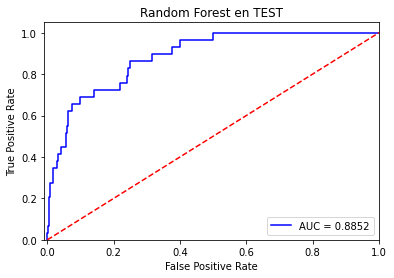

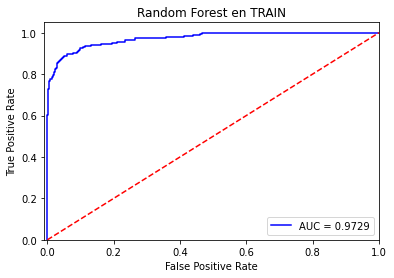

In [ ]:
clf_sel = RandomForestClassifier(n_estimators=200,max_features='sqrt', max_depth=6,  bootstrap=True)# best kaggle
clf_sel.fit(XTrain_kaggle_balanced_s1_df.values, yTrain_kaggle_balanced_df.values)

prediccion_rf = clf_sel.predict_proba(XTest_kaggle_imp_df[selected_features_uncorrelated1].values)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(yTest_df.values, prediccion_rf, pos_label = 1)
AUC_rf = metrics.auc(fpr, tpr)

plt.title('Random Forest en TEST')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUC_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

prediccion_rf = clf_sel.predict_proba(XTrain_kaggle_balanced_s1_df.values)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(yTrain_kaggle_balanced_df.values, prediccion_rf, pos_label = 1)
AUC_rf = metrics.auc(fpr, tpr)

plt.title('Random Forest en TRAIN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUC_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#Evaluación de modelos utilizados en la competencia: 
Se reporta y calcula el poder predictivo de los modelos utilizados, tanto en la muestra de test interna para la elección del modelo a enviar, como el número registrado por kaggle en el ranking

### Regresion logistica



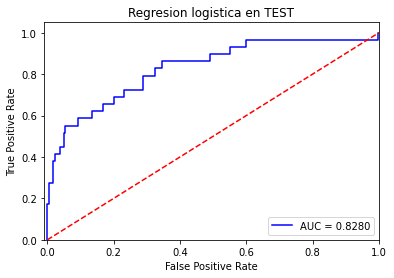

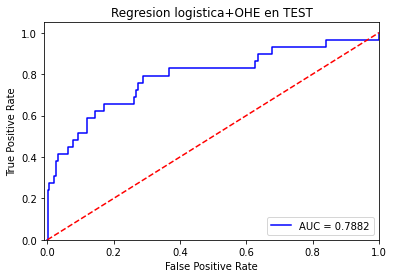

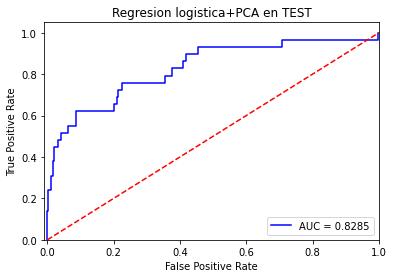

In [ ]:
#kaggle
clfRegLog= LogisticRegression(random_state=0,max_iter=10000)
clfRegLog.fit(XTrain_kaggle_balanced_s1_df.values,yTrain_kaggle_balanced_df.values)

prediccionesProbRegLog=clfRegLog.predict_proba(XTest_kaggle_imp_df[selected_features_uncorrelated1].values)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(yTest_df.values, prediccionesProbRegLog, pos_label = 1)
AUC_lr = metrics.auc(fpr, tpr)
plt.title('Regresion logistica en TEST')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUC_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


clfRegLog= LogisticRegression(random_state=0,max_iter=10000)
clfRegLog.fit(XTrain_std_ohe_balanced_s1_df.values,yTrain_std_ohe_balanced_df.values)

prediccionesProbRegLog=clfRegLog.predict_proba(XTest_std_ohe_imp_df[selected_features_uncorrelated3].values)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(yTest_df.values, prediccionesProbRegLog, pos_label = 1)
AUC_ohe_lr = metrics.auc(fpr, tpr)
plt.title('Regresion logistica+OHE en TEST')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUC_ohe_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



clfRegLog= LogisticRegression(random_state=0,max_iter=10000)
clfRegLog.fit(ZTrain_kaggle_std_balanced_df.values,yTrain_kaggle_std_balanced_df.values)

prediccionesProbRegLog=clfRegLog.predict_proba(ZTest_kaggle_std_imp_df.values)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(yTest_df.values, prediccionesProbRegLog, pos_label = 1)
AUC_pca_lr = metrics.auc(fpr, tpr)
plt.title('Regresion logistica+PCA en TEST')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUC_pca_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### LDA

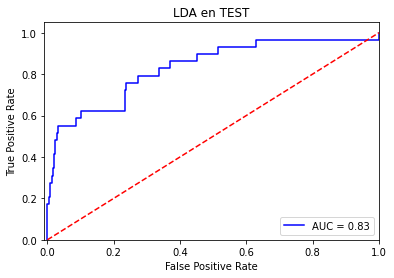

In [ ]:
clfLDA = LinearDiscriminantAnalysis()
clfLDA.fit(XTrain_kaggle_balanced_s1_df.values,yTrain_kaggle_balanced_df.values)

prediccionesProbLDA=clfLDA.predict_proba(XTest_kaggle_imp_df[selected_features_uncorrelated1].values)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(yTest_df.values, prediccionesProbLDA, pos_label = 1)
AUC_lda = metrics.auc(fpr, tpr)

plt.title('LDA en TEST')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC_lda)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### QDA

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


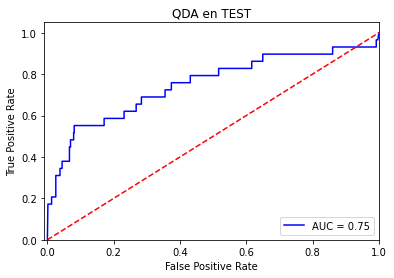

In [ ]:
clfQDA = QuadraticDiscriminantAnalysis()
clfQDA.fit(XTrain_kaggle_balanced_s1_df.values,yTrain_kaggle_balanced_df.values)

prediccionesProbQDA = clfQDA.predict_proba(XTest_kaggle_imp_df[selected_features_uncorrelated1].values)[:, 1]

fpr, tpr, thresholds = metrics.roc_curve(yTest_df.values, prediccionesProbQDA, pos_label = 1)
AUC_qda = metrics.auc(fpr, tpr)

plt.title('QDA en TEST')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC_qda)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### Naive Bayes

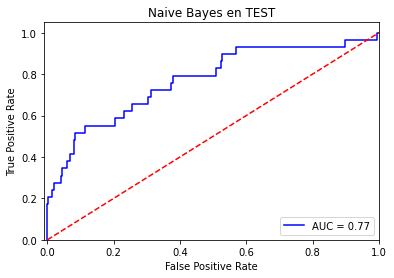

In [ ]:
clfNB = GaussianNB()
clfNB.fit(XTrain_kaggle_balanced_s1_df.values,yTrain_kaggle_balanced_df.values)


prediccionesProbNB=clfNB.predict_proba(XTest_kaggle_imp_df[selected_features_uncorrelated1].values)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(yTest_df.values, prediccionesProbNB, pos_label = 1)
AUC_nb = metrics.auc(fpr, tpr)

plt.title('Naive Bayes en TEST')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC_nb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### Decision Tree


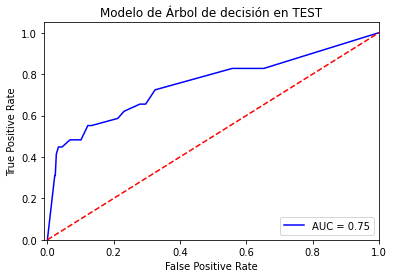

In [ ]:
modelo_arbol = DecisionTreeClassifier(random_state=0, max_depth=6)
modelo_arbol.fit(XTrain_kaggle_balanced_s1_df.values,yTrain_kaggle_balanced_df.values)

prediccion_arbol = modelo_arbol.predict_proba(XTest_kaggle_imp_df[selected_features_uncorrelated1].values)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(yTest_df.values, prediccion_arbol, pos_label = 1)
AUC_arbol = metrics.auc(fpr, tpr)

plt.title('Modelo de Árbol de decisión en TEST')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC_arbol)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### Bagging Decision Tree

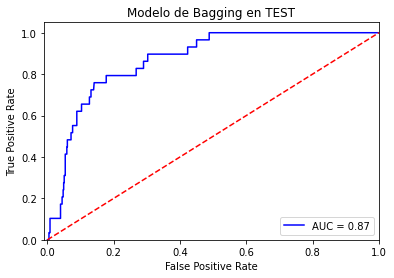

In [ ]:
modelo_bg = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators = 200, random_state = 0)
modelo_bg.fit(XTrain_kaggle_balanced_s1_df.values,yTrain_kaggle_balanced_df.values)

prediccion_bg = modelo_bg.predict_proba(XTest_kaggle_imp_df[selected_features_uncorrelated1].values)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(yTest_df.values, prediccion_bg, pos_label = 1)
AUC_bg = metrics.auc(fpr, tpr)

plt.title('Modelo de Bagging en TEST')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC_bg)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### Random Forest

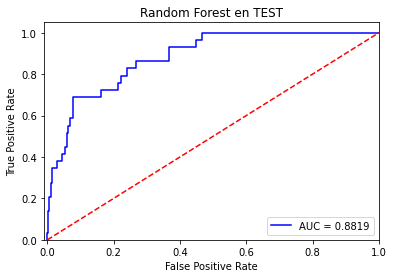

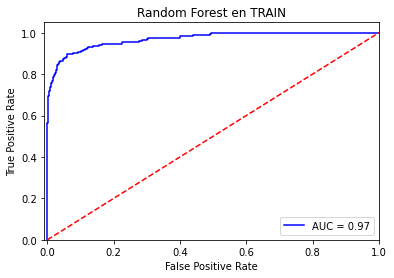

In [ ]:
modelo_rf = RandomForestClassifier(n_estimators=200,max_features='sqrt', max_depth=6,  bootstrap=True)# best in kaggle
modelo_rf.fit(XTrain_kaggle_balanced_s1_df.values,yTrain_kaggle_balanced_df.values)

prediccion_rf = modelo_rf.predict_proba(XTest_kaggle_imp_df[selected_features_uncorrelated1].values)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(yTest_df.values, prediccion_rf, pos_label = 1)
AUC_rf = metrics.auc(fpr, tpr)
plt.title('Random Forest en TEST')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUC_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

prediccion_rf = modelo_rf.predict_proba(XTrain_kaggle_balanced_s1_df.values)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(yTrain_kaggle_balanced_df.values, prediccion_rf, pos_label = 1)
plt.title('Random Forest en TRAIN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' %  metrics.auc(fpr, tpr))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### Gradient boosting

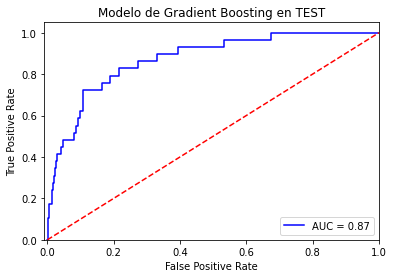

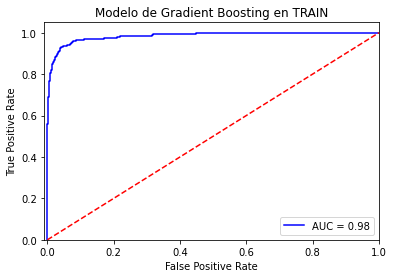

In [ ]:
modelo_gb = GradientBoostingClassifier(n_estimators=100,max_features='sqrt', learning_rate=0.1, max_depth=3)
modelo_gb.fit(XTrain_kaggle_balanced_s1_df.values,yTrain_kaggle_balanced_df.values)

prediccion_gb = modelo_gb.predict_proba(XTest_kaggle_imp_df[selected_features_uncorrelated1].values)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(yTest_df.values, prediccion_gb, pos_label=1)
AUC_gb = metrics.auc(fpr, tpr)

plt.title('Modelo de Gradient Boosting en TEST')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC_gb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

prediccion_gb = modelo_gb.predict_proba(XTrain_kaggle_balanced_s1_df.values)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(yTrain_kaggle_balanced_df.values, prediccion_gb, pos_label= 1)

plt.title('Modelo de Gradient Boosting en TRAIN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % metrics.auc(fpr, tpr))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### SVM

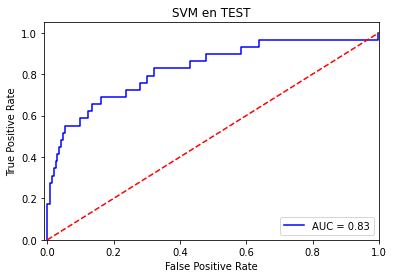

In [ ]:
clf = SVC(kernel='linear',probability=True,random_state=0)
clf.fit(XTrain_kaggle_balanced_s1_df.values,yTrain_kaggle_balanced_df.values)

prediccionesProb=clf.predict_proba(XTest_kaggle_imp_df[selected_features_uncorrelated1].values)

fpr, tpr, thresholds = metrics.roc_curve(yTest_df.values, prediccionesProb[:,1], pos_label=1)
AUC_svm_linear = metrics.auc(fpr, tpr)
plt.title('SVM en TEST')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC_svm_linear)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Redes neuronales

In [ ]:
def create_model():
  # create model
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(100))
  model.add(tf.keras.layers.Activation('relu'))
  model.add(tf.keras.layers.Dense(1))
  model.add(tf.keras.layers.Activation('sigmoid'))
  return model

model = create_model()

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC()]
)

model.fit(XTrain_kaggle_std_balanced_s1_df.values, yTrain_kaggle_std_balanced_df.values, epochs=100, batch_size=64, )

Epoch 1/100
26/26 [==============================] - 2s 6ms/step - loss: 0.6939 - auc_15: 0.4849
Epoch 2/100
26/26 [==============================] - 0s 6ms/step - loss: 0.6735 - auc_15: 0.5056
Epoch 3/100
26/26 [==============================] - 0s 7ms/step - loss: 0.6552 - auc_15: 0.5253
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 0.6384 - auc_15: 0.5435
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 0.6234 - auc_15: 0.5635
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 0.6095 - auc_15: 0.5854
Epoch 7/100
26/26 [==============================] - 0s 5ms/step - loss: 0.5969 - auc_15: 0.6089
Epoch 8/100
26/26 [==============================] - 0s 6ms/step - loss: 0.5855 - auc_15: 0.6293
Epoch 9/100
26/26 [==============================] - 0s 5ms/step - loss: 0.5747 - auc_15: 0.6493
Epoch 10/100
26/26 [==============================] - 0s 6ms/step - loss: 0.5650 - auc_15: 0.6656
Epoch 11/100
26/26 [=========

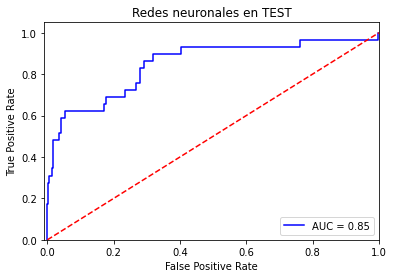

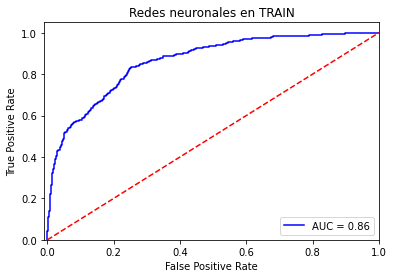

In [ ]:
y_pred_keras = model.predict(XTest_kaggle_std_imp_df[selected_features_uncorrelated1].values, batch_size=64).ravel()
fpr_keras, tpr_keras, thresholds_keras = metrics.roc_curve(yTest_df.values, y_pred_keras)
AUC_nn = metrics.auc(fpr_keras, tpr_keras)

plt.title('Redes neuronales en TEST')
plt.plot(fpr_keras, tpr_keras, 'b', label = 'AUC = %0.2f' % AUC_nn)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


y_pred_keras = model.predict(XTrain_kaggle_std_balanced_s1_df.values, batch_size=64).ravel()
fpr_keras, tpr_keras, thresholds_keras = metrics.roc_curve(yTrain_kaggle_std_balanced_df.values, y_pred_keras)
roc_auc = metrics.auc(fpr_keras, tpr_keras)

plt.title('Redes neuronales en TRAIN')
plt.plot(fpr_keras, tpr_keras, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Selección de modelo final, análisis y conclusiones: 
Se establece explícitamente el modelo con mejor desempeño en la competencia y se analiza y concluye de manera coherente con los resultados obtenidos respecto al desempeño predictivo

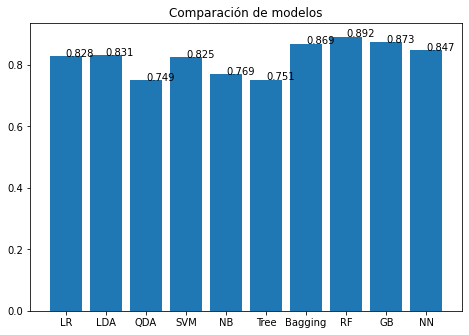

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")

ejeX = ['LR', 'LDA', 'QDA', 'SVM', 'NB', 'Tree', 'Bagging', 'RF', 'GB', 'NN']
ejeY = np.round([AUC_lr, AUC_lda, AUC_qda, AUC_svm_linear, AUC_nb,AUC_arbol,  AUC_bg, AUC_rf, AUC_gb, AUC_nn], 3)
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

### Eleccion del modelo de RandomForest

probamos entre varias seleccion de variables,transformaciones

In [ ]:
print("S1= ", selected_features_uncorrelated1)

S1=  ['B11', 'B31', 'B32', 'B41', 'B42', 'B43', 'B52', 'A1', 'B62', 'B63', 'B610', 'A2', 'A3', 'A4', 'A5']


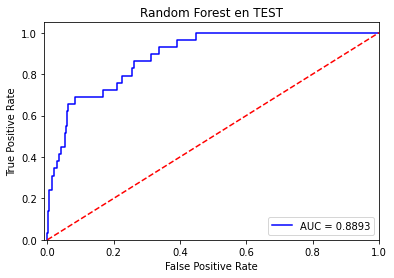

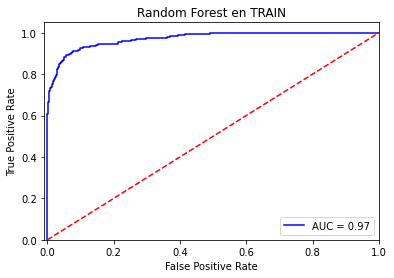

In [ ]:
modelo_rf = RandomForestClassifier(n_estimators=200,max_features='sqrt', max_depth=6,  bootstrap=True)# best in kaggle

modelo_rf.fit(XTrain_kaggle_balanced_s1_df.values,yTrain_kaggle_balanced_df.values)

prediccion_rf = modelo_rf.predict_proba(XTest_kaggle_imp_df[selected_features_uncorrelated1].values)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(yTest_df.values, prediccion_rf, pos_label = 1)
AUC_rf = metrics.auc(fpr, tpr)
plt.title('Random Forest en TEST')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUC_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

prediccion_rf = modelo_rf.predict_proba(XTrain_kaggle_balanced_s1_df.values)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(yTrain_kaggle_balanced_df.values, prediccion_rf, pos_label = 1)
plt.title('Random Forest en TRAIN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' %  metrics.auc(fpr, tpr))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


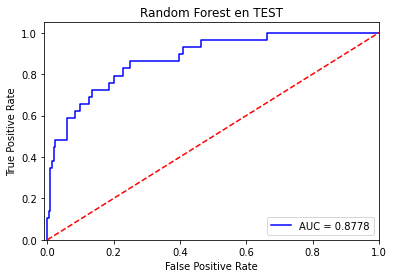

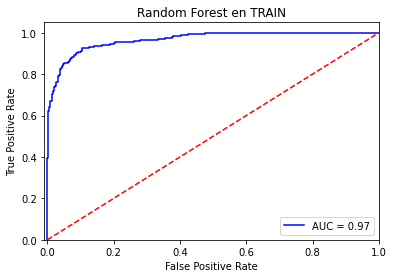

In [ ]:
modelo_rf = RandomForestClassifier(n_estimators=200,max_features='sqrt', max_depth=6,  bootstrap=True)
modelo_rf.fit(XTrain_kaggle_balanced_s4_df.values,yTrain_kaggle_balanced_df.values)

prediccion_rf = modelo_rf.predict_proba(XTest_kaggle_imp_df.iloc[:, rfe_kaggle.support_].values)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(yTest_df.values, prediccion_rf, pos_label = 1)
AUC_s4_num_rf = metrics.auc(fpr, tpr)
plt.title('Random Forest en TEST')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUC_s4_num_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

prediccion_rf = modelo_rf.predict_proba(XTrain_kaggle_balanced_s4_df.values)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(yTrain_kaggle_balanced_df.values, prediccion_rf, pos_label = 1)
plt.title('Random Forest en TRAIN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' %  metrics.auc(fpr, tpr))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


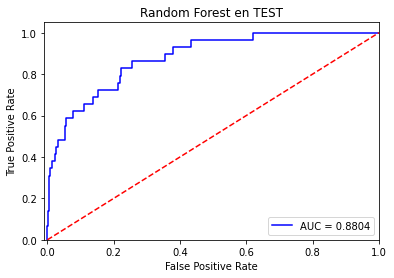

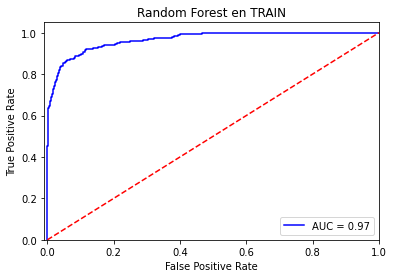

In [ ]:
modelo_rf = RandomForestClassifier(n_estimators=200,max_features='sqrt', max_depth=6,  bootstrap=True)
modelo_rf.fit(XTrain_kaggle_balanced_s5_df.values,yTrain_kaggle_balanced_df.values)

prediccion_rf = modelo_rf.predict_proba(XTest_kaggle_imp_df.iloc[:, sfm_kaggle.get_support()].values)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(yTest_df.values, prediccion_rf, pos_label = 1)
AUC_s5_num_rf = metrics.auc(fpr, tpr)
plt.title('Random Forest en TEST')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUC_s5_num_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

prediccion_rf = modelo_rf.predict_proba(XTrain_kaggle_balanced_s5_df.values)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(yTrain_kaggle_balanced_df.values, prediccion_rf, pos_label = 1)
plt.title('Random Forest en TRAIN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' %  metrics.auc(fpr, tpr))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
print("S1 + categorical variables = ", selected_features_uncorrelated2)

S1 + categorical variables =  ['B11', 'B31', 'B32', 'B41', 'B42', 'B43', 'B52', 'A1', 'B62', 'B63', 'B610', 'A2', 'A3', 'A4', 'A5', 'ACTIVOS', 'TIPO.COMERCIO', 'REGION', 'ZONA']


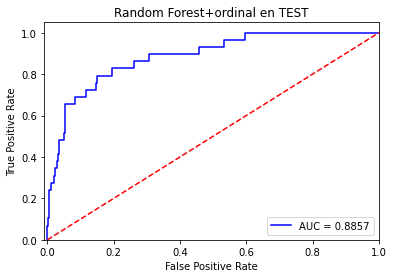

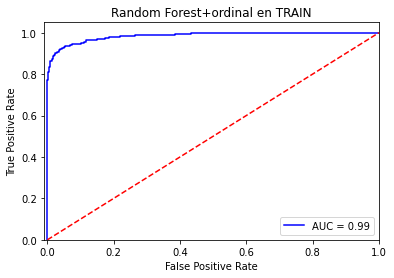

In [ ]:
modelo_rf = RandomForestClassifier(n_estimators=100,max_features='sqrt', max_depth=7,  bootstrap=True)
modelo_rf.fit(XTrain_ordinal_balanced_s1_df.values,yTrain_ordinal_balanced_df.values)

prediccion_rf = modelo_rf.predict_proba(XTest_ordinal_imp_df[selected_features_uncorrelated2].values)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(yTest_df.values, prediccion_rf, pos_label = 1)
AUC_s1_ordinal_rf = metrics.auc(fpr, tpr)
plt.title('Random Forest+ordinal en TEST')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUC_s1_ordinal_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

prediccion_rf = modelo_rf.predict_proba(XTrain_ordinal_balanced_s1_df.values)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(yTrain_ordinal_balanced_df.values, prediccion_rf, pos_label = 1)
plt.title('Random Forest+ordinal en TRAIN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' %  metrics.auc(fpr, tpr))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print("variables no correlacionadas + categorical variables + RFE = ", XTrain_ordinal_balanced_s4_df.columns.to_list())

variables no correlacionadas + categorical variables + RFE =  ['B21', 'B22', 'B23', 'B24', 'B33', 'B53', 'B65', 'B67', 'B68', 'B610', 'B611', 'A3', 'A4', 'A5', 'ACTIVOS']


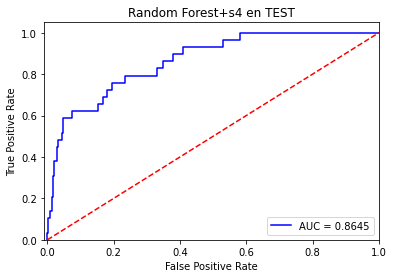

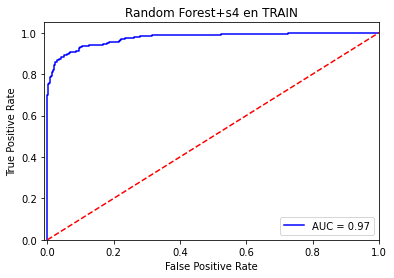

In [ ]:
modelo_rf = RandomForestClassifier(n_estimators=200,max_features='sqrt', max_depth=6,  bootstrap=True)
modelo_rf.fit(XTrain_ordinal_balanced_s4_df.values,yTrain_ordinal_balanced_df.values)

prediccion_rf = modelo_rf.predict_proba(XTest_ordinal_imp_df.iloc[:, rfe_ordinal.support_].values)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(yTest_df.values, prediccion_rf, pos_label = 1)
AUC_s4_ordinal_rf = metrics.auc(fpr, tpr)
plt.title('Random Forest+s4 en TEST')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUC_s4_ordinal_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

prediccion_rf = modelo_rf.predict_proba(XTrain_ordinal_balanced_s4_df.values)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(yTrain_ordinal_balanced_df.values, prediccion_rf, pos_label = 1)
plt.title('Random Forest+s4 en TRAIN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' %  metrics.auc(fpr, tpr))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
print("variables no correlacionadas + categorical variables + SelectFromModel = ", XTrain_ordinal_balanced_s5_df.columns.to_list())

variables no correlacionadas + categorical variables + SelectFromModel =  ['B21', 'B22', 'B23', 'B24', 'B33', 'B65', 'B67', 'B68', 'B610', 'B611', 'A3', 'A4', 'A5', 'ACTIVOS']


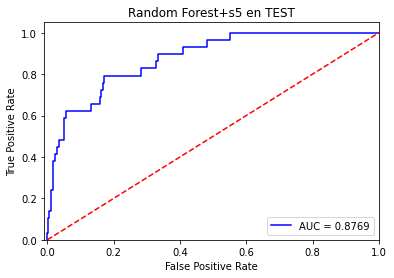

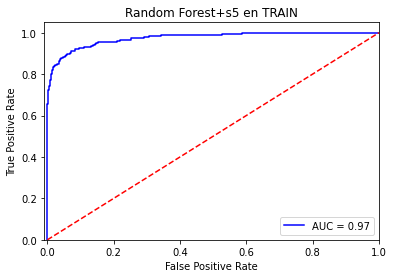

In [ ]:
modelo_rf = RandomForestClassifier(n_estimators=100,max_features='sqrt', max_depth=6,  bootstrap=True)
modelo_rf.fit(XTrain_ordinal_balanced_s5_df.values,yTrain_ordinal_balanced_df.values)

prediccion_rf = modelo_rf.predict_proba(XTest_ordinal_imp_df.iloc[:, sfm_ordinal.get_support()].values)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(yTest_df.values, prediccion_rf, pos_label = 1)
AUC_s5_ordinal_rf = metrics.auc(fpr, tpr)
plt.title('Random Forest+s5 en TEST')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUC_s5_ordinal_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

prediccion_rf = modelo_rf.predict_proba(XTrain_ordinal_balanced_s5_df.values)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(yTrain_ordinal_balanced_df.values, prediccion_rf, pos_label = 1)
plt.title('Random Forest+s5 en TRAIN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' %  metrics.auc(fpr, tpr))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
print("PCA variables numericas + categorical variables =", ZTrain_std_ordinal_balanced_df.columns.to_list())

PCA variables numericas + categorical variables = ['PC-0', 'PC-1', 'PC-2', 'PC-3', 'PC-4', 'PC-5', 'PC-6', 'PC-7', 'PC-8', 'PC-9', 'PC-10', 'PC-11', 'PC-12', 'PC-13', 'PC-14', 'PC-15', 'PC-16', 'PC-17', 'PC-18', 'PC-19', 'TAMA¥O', 'TIPO.COMERCIO', 'REGION', 'ZONA']


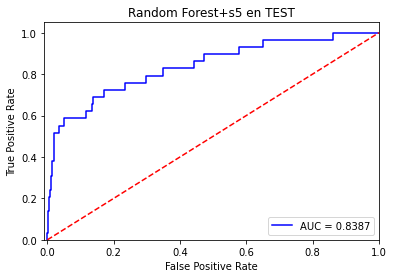

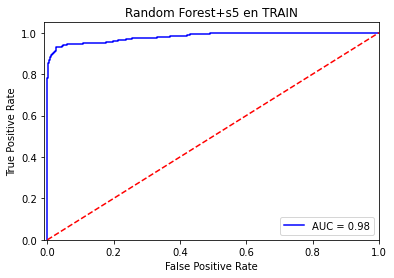

In [ ]:
modelo_rf = RandomForestClassifier(n_estimators=100,max_features='sqrt', max_depth=6,  bootstrap=True)
modelo_rf.fit(ZTrain_std_ordinal_balanced_df.values,yTrain_ordinal_balanced_df.values)

prediccion_rf = modelo_rf.predict_proba(ZTest_std_ordinal_imp_df.values)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(yTest_df.values, prediccion_rf, pos_label = 1)
AUC_pca_ordinal_rf = metrics.auc(fpr, tpr)
plt.title('Random Forest+s5 en TEST')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUC_pca_ordinal_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

prediccion_rf = modelo_rf.predict_proba(ZTrain_std_ordinal_balanced_df.values)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(yTrain_ordinal_balanced_df.values, prediccion_rf, pos_label = 1)
plt.title('Random Forest+s5 en TRAIN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' %  metrics.auc(fpr, tpr))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
print("PCA variables numericas =", ZTrain_kaggle_std_balanced_df.columns.to_list())

PCA variables numericas = ['PC-0', 'PC-1', 'PC-2', 'PC-3', 'PC-4', 'PC-5', 'PC-6', 'PC-7', 'PC-8', 'PC-9', 'PC-10', 'PC-11', 'PC-12', 'PC-13', 'PC-14', 'PC-15', 'PC-16', 'PC-17', 'PC-18']


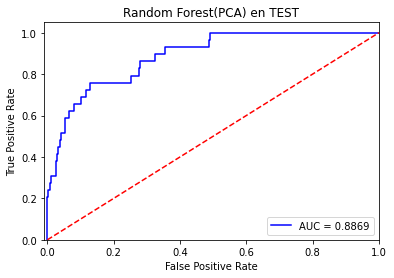

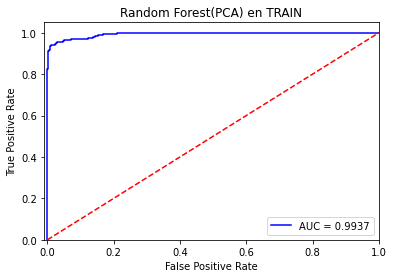

In [ ]:
clf_sel = RandomForestClassifier(n_estimators=200,max_features='sqrt', max_depth=9)
clf_sel.fit(ZTrain_kaggle_std_balanced_df.values, yTrain_kaggle_std_balanced_df.values)

prediccion_rf = clf_sel.predict_proba(ZTest_kaggle_std_imp_df.values)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(yTest_df.values, prediccion_rf, pos_label = 1)
AUC_pca_kaggle_rf = metrics.auc(fpr, tpr)

plt.title('Random Forest(PCA) en TEST')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUC_pca_kaggle_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


prediccion_rf = clf_sel.predict_proba(ZTrain_kaggle_std_balanced_df.values)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(yTrain_kaggle_std_balanced_df.values, prediccion_rf, pos_label = 1)

plt.title('Random Forest(PCA) en TRAIN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % metrics.auc(fpr, tpr))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
ZTrain_kaggle_std_balanced_df.shape

(1664, 19)

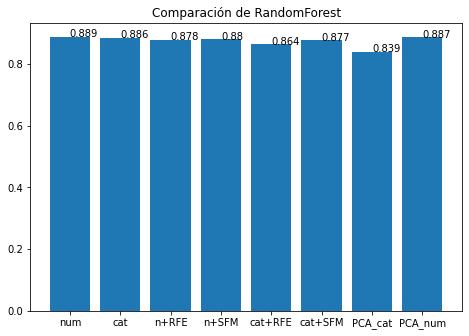

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de RandomForest")

ejeX = ['num', 'cat', 'n+RFE', 'n+SFM', 'cat+RFE', 'cat+SFM', 'PCA_cat', 'PCA_num']
ejeY = np.round([AUC_rf,AUC_s1_ordinal_rf, AUC_s4_num_rf, AUC_s5_num_rf, AUC_s4_ordinal_rf, AUC_s5_ordinal_rf, AUC_pca_ordinal_rf, AUC_pca_kaggle_rf], 3)
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

### Entrenar el modelo seleccionado con todos el total de datos de entrenamiento

In [ ]:
print(XTotal_df.shape)
print(yTotal_df.shape)

(2000, 39)
(2000,)


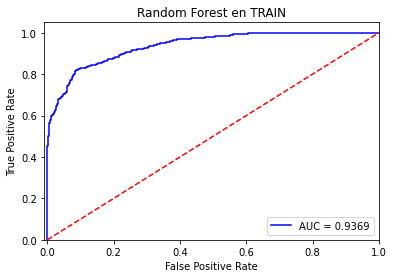

In [ ]:


# imputacion
XTotal_imp_df = imp_mult.transform(XTotal_df[kaggle_features])
XTotal_imp_df = pd.DataFrame(XTotal_imp_df, columns=kaggle_features)

# balanceo
oversample = SMOTE(sampling_strategy=0.3)
XTotal_s_balanceado_df, yTotal_s_balanceado_df = oversample.fit_resample(XTotal_imp_df, yTotal_df)

# seleccion de variables 
XTotal_s_sel = XTotal_s_balanceado_df[selected_features_uncorrelated1]


clf_sel = RandomForestClassifier(n_estimators=200,max_features='sqrt', max_depth=5,  bootstrap=True)
clf_sel.fit(XTotal_s_sel, yTotal_s_balanceado_df)
prediccion_rf = clf_sel.predict_proba(XTotal_s_sel)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(yTotal_s_balanceado_df, prediccion_rf, pos_label = 1)
AUC_rf = metrics.auc(fpr, tpr)

plt.title('Random Forest en TRAIN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUC_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



# Publicacion kaggle

# imputacion
XTest_s_imp = imp_mult.transform(test_df[kaggle_features])
XTest_s_imp = pd.DataFrame(XTest_s_imp, columns=kaggle_features)

# seleccion de variables 
XTest_s_sel = XTest_s_imp[selected_features_uncorrelated1]

predict_test = clf_sel.predict_proba(XTest_s_sel)[:, 1]
df = pd.DataFrame(predict_test, columns=['Probabilidad'])
df['Id'] = test_df.index.to_numpy()+1
df[['Id','Probabilidad']].to_csv("submission_rf_13.csv", index=False)

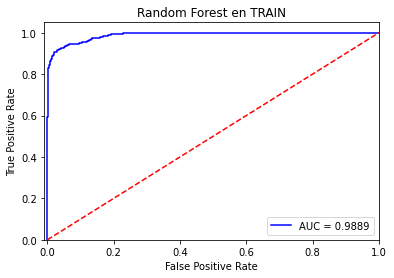

In [ ]:
# escalado/transformacion
tmp = preprocess_pipeline_kaggle_with_scale.fit_transform(XTotal_df)
tmp_df = pd.DataFrame(tmp, columns=kaggle_features)

# imputacion
XTotal_imp_df = imp_mult_std.transform(tmp_df)
XTotal_imp_df = pd.DataFrame(XTotal_imp_df, columns=kaggle_features)

# balanceo
oversample = SMOTE(sampling_strategy=0.3)
XTotal_s_balanceado_df, yTotal_s_balanceado_df = oversample.fit_resample(XTotal_imp_df, yTotal_df)

# seleccion de variables 
pca_variance = PCA(n_components=0.98, svd_solver='full')
ZTotal_s_sel = pca_variance.fit_transform(XTotal_s_balanceado_df)


clf_sel = RandomForestClassifier(n_estimators=200,max_features='sqrt', max_depth=8)
clf_sel.fit(ZTotal_s_sel, yTotal_s_balanceado_df)
prediccion_rf = clf_sel.predict_proba(ZTotal_s_sel)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(yTotal_s_balanceado_df, prediccion_rf, pos_label = 1)
AUC_rf = metrics.auc(fpr, tpr)

plt.title('Random Forest en TRAIN')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % AUC_rf)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Publicacion kaggle

#escalado
tmp = preprocess_pipeline_kaggle_with_scale.transform(test_df)
tmp_df = pd.DataFrame(tmp, columns=kaggle_features)

# imputacion
XTest_s_imp = imp_mult_std.transform(tmp_df)
XTest_s_imp = pd.DataFrame(XTest_s_imp, columns=kaggle_features)

# seleccion de variables 
ZTest_s_sel = pca_variance.transform(XTest_s_imp)


predict_test = clf_sel.predict_proba(ZTest_s_sel)[:, 1]
df = pd.DataFrame(predict_test, columns=['Probabilidad'])
df['Id'] = test_df.index.to_numpy()+1
df[['Id','Probabilidad']].to_csv("submission_rf_11.csv", index=False)